**Drought** prediction project

Step 1: Data Preparation

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = """tem,Month,Year,rain
16.976,1,1901,18.5356
19.9026,2,1901,16.2548
24.3158,3,1901,70.7981
28.1834,4,1901,66.1616
27.8892,5,1901,267.215
28.8925,6,1901,341.042
28.3327,7,1901,540.907
27.9243,8,1901,493.21
27.6057,9,1901,291.549
27.0887,10,1901,199.171
22.1671,11,1901,126.285
18.5574,12,1901,1.69035
18.5455,1,1902,1.29152
20.1252,2,1902,0.14722
25.5508,3,1902,62.7686
26.5562,4,1902,229.589
27.3165,5,1902,302.197
28.266,6,1902,528.775
27.6247,7,1902,415.257
28.1001,8,1902,435.166
27.7271,9,1902,282.872
26.0153,10,1902,76.6518
21.9907,11,1902,4.48053
18.2532,12,1902,6.51869
17.7023,1,1903,2.4001
19.5474,2,1903,16.7112
24.3562,3,1903,35.0165
28.0898,4,1903,79.8924
28.5913,5,1903,206.714
27.906,6,1903,606.088
28.6851,7,1903,376.786
27.5889,8,1903,401.075
27.7468,9,1903,288.777
26.8644,10,1903,190.116
22.4298,11,1903,53.8007
18.3745,12,1903,0.0104
17.7866,1,1904,0.3257
19.9656,2,1904,40.4723
25.0148,3,1904,32.017
27.3117,4,1904,169.242
27.1157,5,1904,317.756
27.8145,6,1904,525.691
27.4404,7,1904,707.404
27.9148,8,1904,367.376
27.9551,9,1904,181.867
26.2871,10,1904,72.9881
22.1525,11,1904,32.9518
18.7779,12,1904,1.97838
17,1,1905,7.07224
17.8269,2,1905,22.9071
22.9851,3,1905,78.9631
25.4188,4,1905,203.005
27.1236,5,1905,315.752
29.0868,6,1905,224.887
27.8607,7,1905,559.799
27.4862,8,1905,624.073
27.8164,9,1905,623.689
26.5021,10,1905,133.63
22.6873,11,1905,4.91701
18.6721,12,1905,7.61877
17.5423,1,1906,13.9546
19.4317,2,1906,65.6833
23.0485,3,1906,53.425
27.9907,4,1906,29.6299
28.4449,5,1906,229.508
28.2983,6,1906,357.968
28.3345,7,1906,487.922
27.4695,8,1906,388.641
28.3886,9,1906,212.273
26.428,10,1906,185.89
22.7998,11,1906,48.9485
19.2146,12,1906,0.01352
19.0642,1,1907,10.7854
19.7055,2,1907,28.6799
23.1507,3,1907,123.023
26.1498,4,1907,115.429
27.6634,5,1907,234.761
27.8377,6,1907,549.54
27.8421,7,1907,327.091
28.1978,8,1907,223.517
27.8996,9,1907,269.975
26.7797,10,1907,51.2185
22.7542,11,1907,9.41034
18.6971,12,1907,13.5853
17.2889,1,1908,7.99686
20.212,2,1908,12.5831
25.0639,3,1908,8.35921
29.3307,4,1908,44.7567
28.0869,5,1908,281.536
28.3117,6,1908,786.245
27.9535,7,1908,454.244
28.0517,8,1908,696.272
28.0101,9,1908,239.95
26.5604,10,1908,70.0824
22.174,11,1908,3.32205
18.3258,12,1908,0.06706
18.6933,1,1909,3.05691
20.1593,2,1909,5.51192
25.9954,3,1909,0.05684
26.4867,4,1909,297.624
27.9672,5,1909,209.147
27.2679,6,1909,732.781
28.1115,7,1909,353.252
27.414,8,1909,407.441
28.3398,9,1909,193.233
26.8933,10,1909,162.603
23.6615,11,1909,15.8119
19.1166,12,1909,10.6704
17.7787,1,1910,8.7212
19.9987,2,1910,23.461
24.3738,3,1910,42.3547
26.912,4,1910,118.086
27.8941,5,1910,266.631
27.3892,6,1910,547.481
27.3739,7,1910,767.513
27.8772,8,1910,306.786
28.2254,9,1910,273.808
26.2802,10,1910,177.51
22.3027,11,1910,25.508
18.1829,12,1910,0.04428
19.0692,1,1911,14.8878
19.6118,2,1911,5.67389
23.8229,3,1911,53.2531
26.9944,4,1911,120.237
27.6235,5,1911,326.943
27.5065,6,1911,605.515
28.14,7,1911,495.969
27.754,8,1911,737.185
27.7117,9,1911,383.276
26.023,10,1911,153.624
22.1109,11,1911,15.4586
17.7475,12,1911,0.00822
18.2763,1,1912,2.25106
20.9062,2,1912,29.7185
24.4209,3,1912,76.6334
26.0439,4,1912,162.34
27.7741,5,1912,280.501
28.3068,6,1912,432.564
27.6907,7,1912,468.194
27.7733,8,1912,334.72
27.9862,9,1912,185.82
26.2671,10,1912,218.287
22.3421,11,1912,130.107
18.3319,12,1912,4.99061
18.1365,1,1913,1.3331
20.7171,2,1913,52.7534
23.7257,3,1913,65.26
27.9796,4,1913,109.438
27.0109,5,1913,320.563
26.8354,6,1913,766.414
28.0541,7,1913,632.049
27.7176,8,1913,608.192
27.8885,9,1913,201.041
26.0772,10,1913,244.715
21.7421,11,1913,21.013
18.151,12,1913,19.4961
17.9978,1,1914,0.29132
20.6822,2,1914,33.7543
24.4306,3,1914,13.1223
25.8496,4,1914,227.216
27.4998,5,1914,354.499
27.9523,6,1914,522.397
28.0274,7,1914,624.896
27.5587,8,1914,358.844
27.6911,9,1914,195.451
25.4273,10,1914,55.233
22.4916,11,1914,8.40755
19.2066,12,1914,16.6593
18.8711,1,1915,5.29986
20.2688,2,1915,32.7776
24.1828,3,1915,81.4802
27.5293,4,1915,144.341
27.6441,5,1915,438.896
27.7751,6,1915,644.838
28.176,7,1915,604.175
28.1829,8,1915,423.692
27.7224,9,1915,247.244
28.1302,10,1915,140.361
24.4903,11,1915,52.6143
19.089,12,1915,0.92268
17.8694,1,1916,0.81033
20.4223,2,1916,7.77238
25.6592,3,1916,10.455
27.315,4,1916,330.499
28.9475,5,1916,197.267
27.6135,6,1916,603.185
27.5322,7,1916,276.94
27.8663,8,1916,437.713
28.052,9,1916,342.129
26.6718,10,1916,333.453
23.0187,11,1916,89.3188
18.2218,12,1916,2.12559
17.4937,1,1917,0.37143
19.8716,2,1917,37.7137
23.8486,3,1917,25.2565
26.9286,4,1917,149.653
27.1785,5,1917,307.686
27.4378,6,1917,570.203
27.777,7,1917,479.862
27.8983,8,1917,340.538
27.6864,9,1917,319.17
26.5464,10,1917,298.594
22.9189,11,1917,74.9472
18.5966,12,1917,0.08277
17.1998,1,1918,0.83205
20.0129,2,1918,4.45144
24.9119,3,1918,26.2286
26.6262,4,1918,186.424
27.6326,5,1918,300.067
26.4861,6,1918,583.023
28.2649,7,1918,506.578
27.4965,8,1918,478.53
28.0696,9,1918,230.131
26.5865,10,1918,83.0429
22.6765,11,1918,4.25047
18.4667,12,1918,5.10306
18.9095,1,1919,10.3983
19.706,2,1919,10.9028
25.8395,3,1919,7.77532
27.1635,4,1919,135.889
28.165,5,1919,350.062
28.0003,6,1919,429.508
27.7889,7,1919,316.506
28.3777,8,1919,806.554
27.3902,9,1919,527.605
26.4084,10,1919,77.1145
23.1173,11,1919,58.0797
18.9201,12,1919,1.20948
18.7317,1,1920,2.20118
19.8729,2,1920,25.7535
24.0729,3,1920,103.99
27.0365,4,1920,82.0514
27.7238,5,1920,273.926
28.6608,6,1920,434.396
28.4222,7,1920,462.428
27.8438,8,1920,519.612
27.968,9,1920,306.14
26.9096,10,1920,121.032
23.1647,11,1920,3.84201
19.6288,12,1920,0.70148
19.0034,1,1921,25.5379
20.4179,2,1921,6.73176
25.4407,3,1921,35.4543
27.5527,4,1921,280.166
28.8115,5,1921,168.951
27.7312,6,1921,559.224
28.1502,7,1921,563.936
27.9259,8,1921,452.636
28.1141,9,1921,239.818
25.4904,10,1921,102.363
22.401,11,1921,12.7244
19.1064,12,1921,1.9763
18.621,1,1922,6.28317
21.033,2,1922,2.50415
25.7471,3,1922,35.1278
28.5568,4,1922,89.4853
28.8271,5,1922,291.993
27.3527,6,1922,628.946
27.9223,7,1922,637.45
27.8164,8,1922,414.03
27.915,9,1922,658.105
25.9622,10,1922,90.2567
23.0288,11,1922,3.28945
19.0427,12,1922,5.05268
18.6312,1,1923,0.2034
19.8836,2,1923,51.6389
24.9515,3,1923,37.3254
27.8685,4,1923,225.583
28.1951,5,1923,217.668
28.7014,6,1923,375.707
27.8902,7,1923,264.157
28.1404,8,1923,741.587
28.085,9,1923,163.07
26.1335,10,1923,111.23
22.9939,11,1923,21.4818
19.4361,12,1923,5.71822
18.4881,1,1924,3.75275
20.5691,2,1924,10.9122
26.6422,3,1924,0.77195
28.7039,4,1924,109.904
28.2107,5,1924,258.384
29.0303,6,1924,642.036
27.8485,7,1924,572.381
27.8401,8,1924,683.449
27.397,9,1924,317.495
27.2626,10,1924,119.125
22.7645,11,1924,143.815
19.0319,12,1924,0.42203
16.9382,1,1925,7.44247
19.0482,2,1925,9.08182
24.7465,3,1925,18.3886
27.0765,4,1925,347.585
27.1711,5,1925,249.362
27.9974,6,1925,528.94
27.6439,7,1925,670.233
28.0744,8,1925,469.48
27.5406,9,1925,219.913
25.8388,10,1925,130.232
22.5173,11,1925,8.96177
18.4914,12,1925,0.20418
18.0436,1,1926,14.6215
20.7124,2,1926,8.2562
23.8361,3,1926,95.8359
26.692,4,1926,109.066
27.8134,5,1926,227.869
28.874,6,1926,277.9
27.8577,7,1926,796.267
27.9764,8,1926,341.633
28.0988,9,1926,258.316
26.6226,10,1926,179.601
21.9718,11,1926,9.40578
19.622,12,1926,25.1592
18.0251,1,1927,17.809
19.7421,2,1927,38.0801
23.1684,3,1927,28.5818
27.5302,4,1927,85.4605
27.4235,5,1927,260.88
28.3215,6,1927,675.394
28.2326,7,1927,656.572
27.9566,8,1927,457.57
27.6875,9,1927,272.553
26.8392,10,1927,150.797
22.7253,11,1927,24.6582
19.4851,12,1927,0
18.5036,1,1928,6.30357
21.1361,2,1928,10.4603
25.5137,3,1928,4.49918
27.8824,4,1928,133.607
27.8043,5,1928,311.074
27.5143,6,1928,586.373
27.978,7,1928,589.271
28.1385,8,1928,495.89
28.4182,9,1928,233.426
26.5972,10,1928,267.452
22.4865,11,1928,10.2458
19.461,12,1928,0.49404
18.3725,1,1929,16.7175
19.683,2,1929,3.23819
25.1633,3,1929,60.8157
27.4018,4,1929,168.841
28.3855,5,1929,242.222
28.2485,6,1929,539.79
27.9211,7,1929,611.303
27.8708,8,1929,332.066
27.9973,9,1929,250.144
26.2202,10,1929,240.915
22.3896,11,1929,6.37303
18.5883,12,1929,6.42947
17.1308,1,1930,5.29223
20.2585,2,1930,23.9319
24.836,3,1930,46.8843
27.5107,4,1930,73.9789
28.2023,5,1930,249.852
27.7208,6,1930,356.157
28.0704,7,1930,701.185
27.8828,8,1930,364.867
28.1845,9,1930,221.913
26.5011,10,1930,111.791
22.5794,11,1930,139.852
18.6454,12,1930,1.11792
19.2912,1,1931,2.36234
20.5581,2,1931,29.9072
24.6265,3,1931,58.5361
28.3371,4,1931,195.949
27.7868,5,1931,293.215
28.8507,6,1931,281.272
27.7335,7,1931,461.884
28.6073,8,1931,276.823
27.6722,9,1931,347.207
26.9166,10,1931,129.201
22.3272,11,1931,33.165
19.425,12,1931,6.29039
18.7903,1,1932,1.61393
19.2857,2,1932,21.3381
25.3485,3,1932,19.255
27.8492,4,1932,195.019
27.9615,5,1932,382.466
28.2926,6,1932,589.857
27.9526,7,1932,566.606
28.0368,8,1932,261.476
28.1666,9,1932,288.672
27.2559,10,1932,86.9181
23.2841,11,1932,119.142
19.3707,12,1932,6.31867
17.267,1,1933,10.6943
20.9302,2,1933,18.6183
25.4578,3,1933,4.25047
26.6786,4,1933,157.455
27.5726,5,1933,329.327
27.705,6,1933,429.113
27.8826,7,1933,610.431
27.7244,8,1933,411.573
28.0191,9,1933,221.405
26.7932,10,1933,175.592
22.5782,11,1933,4.34117
19.0815,12,1933,2.62996
17.9754,1,1934,7.59007
20.2944,2,1934,39.558
25.0594,3,1934,22.8781
27.9356,4,1934,133.701
28.2405,5,1934,326.382
27.5306,6,1934,371.785
28.1013,7,1934,575.555
28.0593,8,1934,316.366
28.4278,9,1934,747.339
26.2628,10,1934,223.748
22.1819,11,1934,32.3631
19.0272,12,1934,7.33182
17.6546,1,1935,4.94338
20.6904,2,1935,25.3281
25.3797,3,1935,20.2926
27.3559,4,1935,99.9117
29.3369,5,1935,156.903
28.5321,6,1935,552.279
28.4028,7,1935,373.398
27.5299,8,1935,633.872
28.0197,9,1935,250.749
26.8749,10,1935,47.22
23.2079,11,1935,17.8729
19.0876,12,1935,2.27944
17.6556,1,1936,5.30771
19.9519,2,1936,25.2687
25.6072,3,1936,23.6988
28.1323,4,1936,158.12
27.7471,5,1936,394.917
27.1586,6,1936,533.732
27.9088,7,1936,570.408
28.2978,8,1936,310.979
27.8549,9,1936,366.703
26.127,10,1936,228.993
23.7141,11,1936,7.66937
19.6911,12,1936,21.5583
17.1468,1,1937,0.0265
20.2496,2,1937,30.1397
24.3094,3,1937,5.98596
28.0696,4,1937,103.289
27.8123,5,1937,403.94
28.2435,6,1937,390.076
28.5889,7,1937,335.537
27.9099,8,1937,501.751
28.2349,9,1937,296.256
26.6222,10,1937,180.106
22.6849,11,1937,7.05839
19.1976,12,1937,1.35544
19.2664,1,1938,10.5036
19.4212,2,1938,11.8401
26.1933,3,1938,14.8106
29.1067,4,1938,69.324
27.2286,5,1938,465.273
27.6996,6,1938,717.301
27.7973,7,1938,547.367
28.1085,8,1938,614.125
28.5279,9,1938,220.827
27.2116,10,1938,122.557
21.8681,11,1938,46.7906
18.9308,12,1938,0.16198
18.9613,1,1939,1.57736
21.0936,2,1939,15.5098
24.8663,3,1939,15.5301
28.8783,4,1939,50.3976
28.411,5,1939,321.014
28.1074,6,1939,503.846
27.7214,7,1939,609.832
27.9175,8,1939,458.453
27.7891,9,1939,354.547
26.6052,10,1939,226.98
22.8798,11,1939,7.19556
19.4199,12,1939,2.27083
17.8246,1,1940,0.09005
20.392,2,1940,28.8248
23.1225,3,1940,123.366
27.9876,4,1940,188.578
27.9565,5,1940,356.941
28.3484,6,1940,459.402
27.8575,7,1940,345.623
28.2643,8,1940,651.6
27.9643,9,1940,291.108
27.0944,10,1940,134.946
23.9458,11,1940,4.54599
19.7315,12,1940,7.21845
18.4257,1,1941,9.50147
20.9764,2,1941,18.1531
26.2475,3,1941,11.294
28.4779,4,1941,243.23
28.3179,5,1941,327.274
27.7471,6,1941,783.675
28.1991,7,1941,460.039
28.3456,8,1941,578.413
28.1701,9,1941,222.544
26.4394,10,1941,264.913
22.4904,11,1941,69.0747
20.364,12,1941,3.15451
18.5173,1,1942,5.14758
20.887,2,1942,24.3795
25.4426,3,1942,39.3477
27.5847,4,1942,170.641
28.9374,5,1942,194.522
28.9074,6,1942,269.781
28.4444,7,1942,661.474
27.8112,8,1942,443.541
27.5892,9,1942,452.43
27.0809,10,1942,81.3453
23.8591,11,1942,16.4857
19.2302,12,1942,0.1343
19.4068,1,1943,29.3725
19.539,2,1943,25.4597
24.4346,3,1943,57.1202
26.0894,4,1943,333.39
28.1733,5,1943,208.787
27.9244,6,1943,442.53
27.8151,7,1943,522.932
27.7138,8,1943,509.659
28.1217,9,1943,323.417
27.0109,10,1943,64.8117
23.7047,11,1943,6.26408
20.2734,12,1943,0.82889
18.4048,1,1944,27.2062
20.1012,2,1944,15.227
25.0431,3,1944,42.1676
26.5521,4,1944,145.949
29.1642,5,1944,198.366
28.895,6,1944,460.273
28.2518,7,1944,408.849
28.3515,8,1944,429.219
27.9998,9,1944,230.536
26.8679,10,1944,88.1687
22.9212,11,1944,2.02702
20.3914,12,1944,0.35446
18.2015,1,1945,25.9673
19.3508,2,1945,17.3206
25.7198,3,1945,21.6969
27.5778,4,1945,171.733
27.8711,5,1945,309.845
28.6697,6,1945,383.063
28.3827,7,1945,451.998
28.2371,8,1945,358.178
28.5058,9,1945,297.065
26.2761,10,1945,284.818
22.875,11,1945,8.55173
18.7336,12,1945,0.81369
18.7904,1,1946,0.81116
22.2759,2,1946,16.2432
25.2807,3,1946,51.7841
26.1737,4,1946,267.018
27.7316,5,1946,270.761
27.8769,6,1946,425.059
27.7379,7,1946,395.186
28.3153,8,1946,538.033
28.0705,9,1946,412.309
26.1231,10,1946,297.256
23.7298,11,1946,43.8025
20.0773,12,1946,0.08892
18.4592,1,1947,2.18307
20.8343,2,1947,5.67583
25.3178,3,1947,69.8127
28.6075,4,1947,107.859
28.4113,5,1947,356.112
28.5211,6,1947,442.622
28.12,7,1947,631.931
28.0557,8,1947,446.662
28.0439,9,1947,497.411
26.1121,10,1947,261.153
23.1268,11,1947,1.08203
20.073,12,1947,30.1635
18.8595,1,1948,4.94443
20.5453,2,1948,53.1801
24.3332,3,1948,41.4551
27.3178,4,1948,265.178
27.2727,5,1948,338.362
28.3304,6,1948,383.859
27.6623,7,1948,428.44
27.9189,8,1948,504.491
28.1084,9,1948,273.255
26.2712,10,1948,238.586
23.4262,11,1948,45.6929
18.6645,12,1948,0.34566
18.691,1,1949,8.43542
20.196,2,1949,11.1358
24.974,3,1949,66.8256
25.4455,4,1949,325.503
26.6293,5,1949,397.104
27.9464,6,1949,528.721
27.7579,7,1949,575.004
27.877,8,1949,448.978
27.8519,9,1949,364.827
27.2007,10,1949,124.113
22.2315,11,1949,7.79009
17.6854,12,1949,0.24329
18.5486,1,1950,0.95331
20.1997,2,1950,37.1688
24.4553,3,1950,36.8968
27.7109,4,1950,77.3122
28.4808,5,1950,208.921
27.8493,6,1950,562.629
27.7724,7,1950,429.562
27.3795,8,1950,516.673
28.1418,9,1950,204.392
26.6353,10,1950,194.603
22.3076,11,1950,110.718
19.193,12,1950,0.81345
17.7884,1,1951,1.46508
20.5543,2,1951,0.0057
24.8184,3,1951,48.0227
27.2714,4,1951,134.69
28.2118,5,1951,201.181
28.0756,6,1951,424.819
27.7922,7,1951,639.217
28.3824,8,1951,461.463
28.1077,9,1951,326.631
27.2955,10,1951,261.506
23.2622,11,1951,38.4084
20.3254,12,1951,2.73628
18.9548,1,1952,2.819
21.9137,2,1952,2.5095
24.0828,3,1952,58.8997
27.0739,4,1952,255.301
27.5969,5,1952,288.571
28.4238,6,1952,504.859
27.7268,7,1952,603.285
28.033,8,1952,342.201
27.7437,9,1952,352.395
26.9695,10,1952,273.719
23.0584,11,1952,49.1966
19.0419,12,1952,1.43815
17.715,1,1953,13.7329
21.4254,2,1953,7.78775
26.0308,3,1953,64.1822
28.252,4,1953,114.384
28.0526,5,1953,317.316
27.7573,6,1953,543.459
27.7162,7,1953,652.124
28.1521,8,1953,397.148
27.7436,9,1953,415.956
26.4653,10,1953,119.564
22.6183,11,1953,17.1858
20.5814,12,1953,0.75467
17.2898,1,1954,15.6634
22.1992,2,1954,20.5793
25.2363,3,1954,23.3158
29.126,4,1954,91.1713
28.893,5,1954,250.974
27.2109,6,1954,683.143
27.8235,7,1954,466.429
28.0071,8,1954,450.3
28.1271,9,1954,212.264
25.7316,10,1954,177.784
21.666,11,1954,0.14087
19.3207,12,1954,6.70821
17.988,1,1955,4.17168
20.2242,2,1955,2.55556
25.517,3,1955,63.0167
27.234,4,1955,117.456
28.6394,5,1955,214.981
28.1113,6,1955,477.064
27.3639,7,1955,548.997
27.6166,8,1955,451.5
27.976,9,1955,265.446
27.0494,10,1955,171.876
23.0927,11,1955,115.431
18.576,12,1955,0.82756
18.2806,1,1956,12.145
19.802,2,1956,4.21711
25.3792,3,1956,83.9227
27.949,4,1956,118.754
28.0995,5,1956,287.922
27.1197,6,1956,595.058
27.6612,7,1956,483.284
27.9301,8,1956,510.976
27.6135,9,1956,338.255
26.8891,10,1956,173.323
22.9846,11,1956,55.2849
19.3905,12,1956,4.08725
18.6476,1,1957,21.3908
19.5143,2,1957,27.3864
24.0236,3,1957,12.6682
28.3691,4,1957,68.7759
29.2739,5,1957,129.986
28.4367,6,1957,412.538
28.0674,7,1957,527.145
28.4941,8,1957,339.035
28.1995,9,1957,230.859
26.4778,10,1957,78.5405
22.6556,11,1957,0.52471
19.6706,12,1957,1.44234
19.7673,1,1958,4.36869
20.7237,2,1958,31.3106
25.5715,3,1958,18.0814
28.5818,4,1958,137.765
28.8361,5,1958,214.459
29.4177,6,1958,226.438
28.4789,7,1958,401.132
27.9477,8,1958,476.307
28.3228,9,1958,268.075
27.4873,10,1958,166.99
23.6633,11,1958,6.81405
20.1148,12,1958,2.76849
18.5213,1,1959,25.2933
19.8572,2,1959,20.4774
24.6577,3,1959,83.1661
28.165,4,1959,122.485
28.2968,5,1959,359.432
28.168,6,1959,465.967
28.0668,7,1959,443.91
27.9072,8,1959,553.256
27.3399,9,1959,388.106
26.1549,10,1959,402.994
22.3988,11,1959,0.19915
19.419,12,1959,4.4506
18.0893,1,1960,0.03981
22.1152,2,1960,0.97754
23.957,3,1960,47.3186
29.2185,4,1960,27.0602
29.2217,5,1960,250.843
28.6191,6,1960,360.87
27.5236,7,1960,669.317
28.4533,8,1960,347.803
27.8695,9,1960,389.229
26.882,10,1960,134.597
22.4092,11,1960,29.934
19.7958,12,1960,0.58055
19.0652,1,1961,6.16273
19.0658,2,1961,22.7065
26.0556,3,1961,22.3121
28.555,4,1961,87.3954
28.4711,5,1961,192.679
27.9452,6,1961,972.536
28.0834,7,1961,294.587
28.2561,8,1961,510.77
27.8613,9,1961,208.662
26.8185,10,1961,169.7
22.0269,11,1961,5.16209
17.5351,12,1961,0.60981
17.0844,1,1962,8.66949
20.6306,2,1962,22.2978
25.1073,3,1962,6.04963
28.0974,4,1962,95.3012
27.9313,5,1962,319.335
27.9382,6,1962,399.432
28.6468,7,1962,509.042
27.8838,8,1962,401.382
28.3854,9,1962,207.679
26.4392,10,1962,170.023
22.4533,11,1962,0.1717
19.1662,12,1962,0.7377
17.7822,1,1963,0.58449
21.9651,2,1963,0.9191
24.9482,3,1963,33.631
26.9333,4,1963,117.506
27.1739,5,1963,272.534
27.9536,6,1963,459.493
28.0948,7,1963,572.234
28.296,8,1963,299.125
28.4266,9,1963,266.525
26.5765,10,1963,238.534
22.9553,11,1963,13.3191
19.7094,12,1963,0.78731
17.9709,1,1964,5.94211
21.1238,2,1964,19.8919
26.2558,3,1964,24.7424
27.2635,4,1964,213.125
27.8866,5,1964,238.66
28.2793,6,1964,502.621
27.3133,7,1964,569.584
28.2281,8,1964,326.531
28.1808,9,1964,270.624
27.1473,10,1964,316.161
23.5157,11,1964,29.8628
19.7899,12,1964,0.15303
18.6764,1,1965,0.27337
20.4685,2,1965,37.1055
23.8589,3,1965,37.4934
27.4561,4,1965,52.9001
28.676,5,1965,192.222
28.0528,6,1965,448.92
27.5588,7,1965,602.78
27.1909,8,1965,556.13
27.7401,9,1965,286.953
26.5774,10,1965,102.255
23.1994,11,1965,33.2288
19.7873,12,1965,14.7019
18.4824,1,1966,15.4377
22.1565,2,1966,0.87698
25.1246,3,1966,22.8879
28.5128,4,1966,53.478
29.1766,5,1966,183.664
27.728,6,1966,423.554
28.2117,7,1966,429.89
27.9247,8,1966,456.18
27.6962,9,1966,318.377
25.7202,10,1966,175.73
23.7204,11,1966,23.6765
19.1252,12,1966,29.1764
18.6105,1,1967,24.1993
21.2856,2,1967,3.72153
23.8405,3,1967,95.0896
26.5681,4,1967,145.831
28.1967,5,1967,197.062
28.1625,6,1967,318.576
28.075,7,1967,511.037
27.9847,8,1967,377.757
27.4322,9,1967,363.87
26.1048,10,1967,132.535
21.6477,11,1967,2.10312
19.6023,12,1967,0.45729
17.9779,1,1968,8.01219
19.643,2,1968,7.75839
24.9615,3,1968,53.2339
27.1675,4,1968,107.727
28.0834,5,1968,267.954
26.9702,6,1968,800.141
27.7856,7,1968,511.001
28.0264,8,1968,415.247
28.4405,9,1968,199.112
26.4382,10,1968,128.784
23.1298,11,1968,23.7808
19.5489,12,1968,1.31776
17.8455,1,1969,3.66924
21.0472,2,1969,0.74622
25.8095,3,1969,90.9436
27.8697,4,1969,157.083
28.6643,5,1969,125.659
28.1842,6,1969,416.228
28.131,7,1969,543.448
27.3112,8,1969,539.158
28.0775,9,1969,324.491
26.4501,10,1969,66.7082
23.2061,11,1969,25.0749
19.5562,12,1969,0.59785
17.8687,1,1970,16.7087
20.8429,2,1970,16.3557
25.1381,3,1970,30.2124
28.1814,4,1970,88.686
28.8184,5,1970,153.278
28.1102,6,1970,636.673
27.7758,7,1970,550.896
28.0489,8,1970,421.068
27.7837,9,1970,404.488
26.3453,10,1970,296.902
22.8516,11,1970,55.8865
19.17,12,1970,0.05075
18.1881,1,1971,11.8691
19.7759,2,1971,6.31247
24.4476,3,1971,8.55389
26.2185,4,1971,69.8946
27.4486,5,1971,147.566
27.438,6,1971,363.691
27.1886,7,1971,517.82
26.9405,8,1971,478.907
27.8165,9,1971,279.091
26.6511,10,1971,160.661
22.2256,11,1971,71.9736
19.3208,12,1971,0.2358
18.7213,1,1972,1.34663
18.6849,2,1972,26.5107
25.0857,3,1972,25.2717
27.1956,4,1972,104.872
29.0864,5,1972,155.076
28.2846,6,1972,317.996
28.3326,7,1972,375.331
27.4792,8,1972,424.779
28.1104,9,1972,199.335
26.6273,10,1972,87.8432
23.1532,11,1972,2.57908
19.4455,12,1972,0.02066
18.8691,1,1973,4.79803
21.9105,2,1973,31.0566
24.1362,3,1973,46.4803
28.5821,4,1973,111.753
27.042,5,1973,492.833
27.8315,6,1973,478.214
28.2071,7,1973,430.427
27.9847,8,1973,287.732
27.6703,9,1973,384.063
26.7585,10,1973,174.955
22.9698,11,1973,96.3741
19.0137,12,1973,44.2418
17.631,1,1974,5.48967
20.1513,2,1974,0.04505
24.6152,3,1974,118.325
27.2181,4,1974,148.729
27.6897,5,1974,333.845
27.8498,6,1974,382.049
27.0471,7,1974,780.355
27.9089,8,1974,375.054
27.4488,9,1974,334.658
27.6097,10,1974,219.244
24.1236,11,1974,20.3715
18.2645,12,1974,0.7203
18.0454,1,1975,2.66038
20.7283,2,1975,12.4828
25.4553,3,1975,12.8183
28.2002,4,1975,94.5976
28.0144,5,1975,251.874
28.3837,6,1975,338.62
27.1209,7,1975,682.34
27.9833,8,1975,279.506
27.5182,9,1975,343.686
27.4014,10,1975,195.543
22.4417,11,1975,51.6203
18.307,12,1975,0.85572
18.3264,1,1976,1.18694
21.1868,2,1976,17.157
25.5237,3,1976,31.1362
27.7962,4,1976,81.9646
27.4224,5,1976,284.795
27.5163,6,1976,652.306
27.8497,7,1976,473.475
27.3903,8,1976,435.298
27.8908,9,1976,215.449
26.592,10,1976,98.277
24.3715,11,1976,41.4419
19.1128,12,1976,2.1749
17.9541,1,1977,3.89109
20.3662,2,1977,33.824
26.3199,3,1977,25.9827
26.1722,4,1977,304.988
26.4029,5,1977,329.388
27.1542,6,1977,490.912
27.9848,7,1977,514.169
28.1256,8,1977,287.439
28.3048,9,1977,184.801
26.0245,10,1977,149.403
23.717,11,1977,35.8673
19.1805,12,1977,19.7034
16.8006,1,1978,0.6893
20.2042,2,1978,7.28948
24.0473,3,1978,25.2145
27.0655,4,1978,137.157
27.3758,5,1978,363.313
27.4932,6,1978,488.343
27.9215,7,1978,425.095
28.6085,8,1978,359.019
27.6907,9,1978,372.462
27.517,10,1978,107.964
24.0292,11,1978,8.64631
19.7649,12,1978,0.58537
19.1725,1,1979,11.8392
20.0549,2,1979,15.3143
24.9246,3,1979,20.5132
28.2364,4,1979,80.0346
29.526,5,1979,116.378
28.8,6,1979,425.375
28.2819,7,1979,526.512
28.2275,8,1979,536.167
28.0401,9,1979,417.903
26.9451,10,1979,113.73
25.1142,11,1979,25.5128
20.0687,12,1979,40.2626
18.2739,1,1980,3.3678
20.6525,2,1980,42.1885
25.0401,3,1980,60.7095
28.7934,4,1980,74.1954
27.1723,5,1980,347.529
28.2177,6,1980,340.656
28.1036,7,1980,516.119
28.1573,8,1980,395.61
28.396,9,1980,246.292
26.4103,10,1980,185.85
23.3395,11,1980,1.61647
20.3604,12,1980,0.85529
18.3163,1,1981,23.5086
20.644,2,1981,27.508
24.1726,3,1981,86.7601
25.7174,4,1981,378.903
27.1297,5,1981,326.596
28.551,6,1981,405.931
27.6783,7,1981,679.557
28.462,8,1981,376.863
27.9154,9,1981,264.709
27.2273,10,1981,22.197
23.4404,11,1981,1.09602
19.0389,12,1981,44.4069
18.9885,1,1982,0.37417
20.5124,2,1982,21.1194
23.7499,3,1982,39.1975
26.815,4,1982,179.316
28.9711,5,1982,166.775
27.9965,6,1982,413.265
28.5086,7,1982,420.955
27.9058,8,1982,544.534
28.1703,9,1982,284.621
27.0648,10,1982,39.4172
22.5962,11,1982,38.9091
18.8501,12,1982,3.49806
18.0039,1,1983,11.3977
19.7179,2,1983,36.6821
24.6127,3,1983,104.064
26.9736,4,1983,191.055
27.4698,5,1983,377.107
28.7935,6,1983,396.943
28.5904,7,1983,434.307
28.1526,8,1983,484.295
28.1086,9,1983,305.01
27.015,10,1983,280.982
23.8313,11,1983,19.5985
18.8622,12,1983,32.1243
17.7947,1,1984,15.9246
19.9473,2,1984,4.05208
25.536,3,1984,9.63009
28.2474,4,1984,172.021
27.654,5,1984,507.684
27.886,6,1984,565.81
27.7393,7,1984,715.063
28.1933,8,1984,427.289
27.4938,9,1984,381.452
27.5528,10,1984,129.73
23.0039,11,1984,4.52029
19.6511,12,1984,6.63063
18.8171,1,1985,7.44035
20.6197,2,1985,10.7857
26.2622,3,1985,95.98
28.3044,4,1985,119.024
27.6409,5,1985,325.358
28.2298,6,1985,498.385
27.3083,7,1985,409.884
28.3917,8,1985,359.347
27.8588,9,1985,325.074
27.0872,10,1985,97.375
23.0949,11,1985,26.3739
20.4398,12,1985,5.6936
18.8875,1,1986,5.97641
21.0747,2,1986,2.43015
25.6098,3,1986,17.3861
27.0516,4,1986,179.735
27.6381,5,1986,210.662
28.897,6,1986,296.929
27.8074,7,1986,571.737
28.4925,8,1986,304.698
27.3405,9,1986,460.341
26.1029,10,1986,252.867
23.6914,11,1986,135.81
20.0478,12,1986,6.83946
18.9032,1,1987,3.04431
21.7238,2,1987,9.38784
24.8017,3,1987,57.131
27.4476,4,1987,210.204
28.508,5,1987,137.362
29.253,6,1987,521.268
28.0107,7,1987,589.099
28.1384,8,1987,634.122
28.2602,9,1987,357.247
27.3458,10,1987,119.269
24.2419,11,1987,29.0261
20.36,12,1987,15.8961
19.2634,1,1988,0.87756
21.7809,2,1988,31.1986
25.117,3,1988,70.323
28.2212,4,1988,205.354
27.9454,5,1988,418.672
28.0714,6,1988,517.33
28.1468,7,1988,546.468
28.1171,8,1988,479.413
28.5791,9,1988,281.161
27.4519,10,1988,164.222
24.2705,11,1988,91.5198
21.0501,12,1988,12.0457
17.5061,1,1989,2.88141
20.8075,2,1989,18.6473
25.0341,3,1989,15.3381
28.4778,4,1989,93.4202
29.0168,5,1989,287.091
28.2459,6,1989,370.973
28.1345,7,1989,480.33
28.5109,8,1989,176.275
28.1385,9,1989,333.963
27.0998,10,1989,270.976
23.3839,11,1989,3.81756
19.0009,12,1989,4.31961
19.473,1,1990,1.02665
21.1088,2,1990,45.7316
23.7713,3,1990,104.692
26.5503,4,1990,222.121
28.0107,5,1990,278.321
28.5531,6,1990,521.461
27.9207,7,1990,522.194
28.5019,8,1990,358.344
28.2556,9,1990,294.101
26.2772,10,1990,225.056
24.5595,11,1990,57.4948
20.1132,12,1990,15.7285
17.4518,1,1991,15.5629
21.7874,2,1991,28.323
25.9068,3,1991,41.9833
27.3361,4,1991,195.31
27.5258,5,1991,355.596
27.6036,6,1991,411.503
28.1626,7,1991,412.073
28.0767,8,1991,404.229
27.4425,9,1991,514.93
26.5558,10,1991,263.402
22.5562,11,1991,21.6794
18.5561,12,1991,28.904
17.4191,1,1992,6.15095
19.3065,2,1992,50.8807
25.1958,3,1992,9.63505
28.3228,4,1992,38.8075
27.3386,5,1992,207.565
28.3549,6,1992,273.337
27.6078,7,1992,462.745
28.0492,8,1992,318.474
27.7278,9,1992,272.882
26.5026,10,1992,135.043
23.0168,11,1992,6.02325
18.2444,12,1992,2.99477
18.1609,1,1993,9.06548
21.0757,2,1993,47.1214
23.4808,3,1993,87.7526
26.4466,4,1993,135.085
27.0991,5,1993,404.466
27.6713,6,1993,519.834
27.8916,7,1993,484.528
27.867,8,1993,458.954
27.4283,9,1993,356.76
26.6738,10,1993,143.515
23.2391,11,1993,18.7967
19.9446,12,1993,0.01082
18.7418,1,1994,13.981
19.7401,2,1994,27.5964
25.03,3,1994,89.831
27.1263,4,1994,164.774
28.5911,5,1994,204.148
28.0515,6,1994,373.326
28.3919,7,1994,317.352
28.3,8,1994,361.903
28.3021,9,1994,166.025
26.7137,10,1994,91.0517
23.1254,11,1994,9.18975
19.0129,12,1994,0.14889
17.7492,1,1995,9.51787
20.8723,2,1995,29.6508
25.2876,3,1995,21.9067
28.5657,4,1995,53.7673
29.2967,5,1995,212.226
28.8511,6,1995,410.046
27.984,7,1995,585.233
28.1941,8,1995,494.813
27.9357,9,1995,371.108
27.2994,10,1995,79.6197
23.7156,11,1995,140.99
19.1235,12,1995,1.21624
18.5789,1,1996,7.05748
20.6901,2,1996,22.9102
26.0952,3,1996,52.8844
27.8947,4,1996,166.541
28.6148,5,1996,232.497
28.0299,6,1996,397.807
28.1341,7,1996,436.68
27.7894,8,1996,386.234
28.2475,9,1996,258.422
26.6539,10,1996,263.608
23.5364,11,1996,6.52539
19.4872,12,1996,0.41104
17.9503,1,1997,9.95175
19.7434,2,1997,21.4791
25.302,3,1997,69.1094
25.8287,4,1997,148.762
28.2268,5,1997,205.94
28.2152,6,1997,438.014
28.0691,7,1997,525.725
28.2508,8,1997,381.913
27.6086,9,1997,398.26
26.2579,10,1997,45.9865
23.9015,11,1997,11.493
18.8273,12,1997,31.8516
17.7704,1,1998,19.5979
21.3817,2,1998,33.4868
23.833,3,1998,104.975
27.4558,4,1998,191.096
28.848,5,1998,228.972
29.2008,6,1998,368.339
28.1453,7,1998,651.001
28.2394,8,1998,468.56
28.6324,9,1998,274.832
28.6631,10,1998,174.975
24.228,11,1998,102.414
19.9801,12,1998,0.02981
18.9055,1,1999,0.3407
22.7454,2,1999,0.10675
26.2573,3,1999,5.22216
29.5091,4,1999,50.6288
27.9702,5,1999,322.274
28.5738,6,1999,338.123
27.9209,7,1999,800.869
27.8719,8,1999,453.255
27.7741,9,1999,340.816
27.2434,10,1999,272.28
23.7157,11,1999,12.5447
20.4159,12,1999,5.91518
17.8553,1,2000,20.0385
19.8796,2,2000,26.8679
24.1766,3,2000,76.7595
26.9379,4,2000,202.779
27.5459,5,2000,439.359
28.1653,6,2000,366.512
28.2621,7,2000,356.645
28.1104,8,2000,429.486
27.5094,9,2000,320.606
27.0526,10,2000,181.583
23.7323,11,2000,5.0709
19.4021,12,2000,0.21109
19.1684,1,2001,1.05632
22.1418,2,2001,8.84245
25.2322,3,2001,31.1425
28.0317,4,2001,113.584
28.0056,5,2001,385.625
27.9112,6,2001,437.875
28.1778,7,2001,355.399
28.4513,8,2001,394.333
28.6358,9,2001,247.686
27.4927,10,2001,250.576
24.3786,11,2001,21.9283
20.0203,12,2001,0.00843
18.7662,1,2002,16.0598
21.7798,2,2002,1.62475
25.6658,3,2002,54.9691
27.3997,4,2002,203.641
27.9866,5,2002,164.443
28.2914,6,2002,622.822
27.8864,7,2002,615.753
27.9693,8,2002,380.547
28.0888,9,2002,258.746
26.9426,10,2002,84.9505
24.0238,11,2002,127.723
20.2395,12,2002,0.62698
17.9398,1,2003,4.05949
20.9849,2,2003,13.9698
24.4467,3,2003,46.4431
28.153,4,2003,103.609
28.1068,5,2003,229.51
28.1032,6,2003,470.844
28.2792,7,2003,747.537
28.8776,8,2003,199.356
28.7275,9,2003,227.284
27.7419,10,2003,270.92
23.9283,11,2003,34.4858
19.2162,12,2003,25.0712
18.2838,1,2004,3.8527
20.9799,2,2004,3.20108
26.7782,3,2004,36.3113
27.3832,4,2004,226.008
29.1106,5,2004,202.54
28.3582,6,2004,539.037
27.6765,7,2004,319.079
28.5187,8,2004,244.488
28.2945,9,2004,247.653
26.3711,10,2004,345.506
23.2019,11,2004,6.17463
20.5304,12,2004,6.5125
18.7742,1,2005,13.6412
22.0334,2,2005,6.00206
25.8596,3,2005,73.5596
27.9591,4,2005,146.875
28.0449,5,2005,257.578
29.1435,6,2005,263.16
28.2297,7,2005,409.154
28.597,8,2005,220.255
28.3883,9,2005,282.964
26.9262,10,2005,236.316
23.3981,11,2005,5.77824
20.1779,12,2005,2.564
19.4921,1,2006,0.00249
23.6292,2,2006,6.08321
26.212,3,2006,7.92641
27.6793,4,2006,341.871
28.4904,5,2006,199.635
28.458,6,2006,274.958
28.6736,7,2006,428.041
28.6002,8,2006,320.256
28.5336,9,2006,361.797
27.4515,10,2006,112.708
23.9783,11,2006,24.2999
20.7727,12,2006,2.98989
19.093,1,2007,1.04976
20.5513,2,2007,46.5265
25.1484,3,2007,15.9467
28.0036,4,2007,312.651
28.793,5,2007,180.555
28.5409,6,2007,481.578
28.1274,7,2007,496.747
28.8106,8,2007,898.072
28.3902,9,2007,396.955
27.8778,10,2007,229.974
24.1285,11,2007,39.532
20.1536,12,2007,0.10678
19.1005,1,2008,22.6256
19.783,2,2008,12.5362
25.6679,3,2008,38.8424
28.4216,4,2008,101.169
28.5943,5,2008,206.353
27.8427,6,2008,477.063
28.0989,7,2008,588.575
28.1792,8,2008,311.883
28.5522,9,2008,235.861
27.0175,10,2008,160.93
23.7862,11,2008,6.53971
21.0141,12,2008,2.27446
20.3262,1,2009,0.65574
22.7193,2,2009,16.0921
25.9696,3,2009,26.2234
29.1815,4,2009,199.444
28.5577,5,2009,209.835
29.1754,6,2009,224.577
28.8393,7,2009,558.314
28.5917,8,2009,317.717
28.964,9,2009,298.646
27.6979,10,2009,171.9
24.4304,11,2009,49.8057
20.2116,12,2009,3.71126
18.6795,1,2010,0.02014
21.7631,2,2010,4.31731
27.0261,3,2010,98.9955
29.1543,4,2010,283.174
28.8466,5,2010,274.778
28.723,6,2010,451.158
28.7615,7,2010,358.158
28.9236,8,2010,293.918
28.6092,9,2010,349.922
27.9208,10,2010,207.224
25.1333,11,2010,8.98786
19.8122,12,2010,17.4939
18.0523,1,2011,4.69858
21.2404,2,2011,20.0933
25.5009,3,2011,23.1504
27.67,4,2011,89.8199
28.2986,5,2011,258.967
28.5389,6,2011,626.279
28.2877,7,2011,414.579
28.0651,8,2011,1012.02
28.4788,9,2011,275.258
27.474,10,2011,52.3823
23.5306,11,2011,19.8951
20.4366,12,2011,0.95423
16.8493,1,2012,17.7638
20.0185,2,2012,2.89884
25.6603,3,2012,49.1879
26.6947,4,2012,204.675
28.7705,5,2012,237.962
28.5034,6,2012,283.547
28.0643,7,2012,494.22
28.4723,8,2012,388.252
27.879,9,2012,245.315
26.1542,10,2012,166.98
23.0322,11,2012,21.3492
19.6466,12,2012,16.9888
17.7546,1,2013,1.14107
20.6546,2,2013,11.6018
25.3696,3,2013,9.01275
27.366,4,2013,115.73
27.2544,5,2013,307.156
28.894,6,2013,357.403
28.3869,7,2013,473.361
27.8884,8,2013,395.807
28.0005,9,2013,234.519
26.4168,10,2013,254.758
22.1847,11,2013,0.00089
18.5529,12,2013,0.57815
17.1088,1,2014,0.1202
19.2051,2,2014,32.3783
24.4777,3,2014,11.8894
28.5882,4,2014,53.5327
28.7169,5,2014,179.551
28.2088,6,2014,372.435
28.5261,7,2014,403.483
27.9512,8,2014,481.268
27.9355,9,2014,330.746
26.6371,10,2014,57.4383
22.6934,11,2014,0.22844
18.3739,12,2014,0.30376
17.8343,1,2015,8.75886
20.3632,2,2015,24.1695
24.6581,3,2015,21.2529
26.3966,4,2015,198.791
28.3603,5,2015,167.221
28.2169,6,2015,450.405
27.8557,7,2015,715.223
28.0642,8,2015,512.127
28.123,9,2015,353.869
26.8624,10,2015,81.5994
23.1842,11,2015,4.60815
18.7124,12,2015,5.97798
17.83483871,1,2016,7.336310769
22.40862069,2,2016,15.03498205
26.77322581,3,2016,43.6432441
27.56633333,4,2016,103.8363908
27.95225806,5,2016,235.2907805
28.40166667,6,2016,318.1608764
28.23709677,7,2016,492.8279933
28.57387097,8,2016,399.8895974
27.785,9,2016,350.3153092
26.87774194,10,2016,219.9941272
22.73366667,11,2016,96.75129897
20.06709677,12,2016,5.324735385
18.44193548,1,2017,4.938625641
21.34428571,2,2017,7.273871795
23.56709677,3,2017,63.13590974
26.34266667,4,2017,155.1185692
28.31677419,5,2017,272.1865513
28.195,6,2017,422.5002903
28.31548387,7,2017,582.5574785
28.42483871,8,2017,601.4947605
28.09966667,9,2017,385.7137892
26.4183871,10,2017,353.6878185
22.617,11,2017,154.0852415
19.87064516,12,2017,25.4336441
15.92516129,1,2018,7.66066
20.2325,2,2018,12.38131487
24.84580645,3,2018,24.04337538
26.59866667,4,2018,128.0920277
27.35129032,5,2018,265.839779
28.36333333,6,2018,374.8318718
28.95709677,7,2018,384.9185349
28.76580645,8,2018,383.4374933
28.10733333,9,2018,241.4163585
25.3,10,2018,130.1385277
21.54933333,11,2018,29.99348462
18.19806452,12,2018,8.605092821
17.83806452,1,2019,6.183647179
20.5975,2,2019,19.34440462
24.24290323,3,2019,48.39384769
27.63233333,4,2019,176.6482282
28.55032258,5,2019,203.7184164
28.82266667,6,2019,295.2398169
28.51967742,7,2019,576.6793236
28.99580645,8,2019,458.8436333
28.02333333,9,2019,313.2523944
26.07741935,10,2019,212.4899369
22.799,11,2019,87.72067949
17.79290323,12,2019,7.071553333
16.56096774,1,2020,23.14484615
18.84965517,2,2020,12.15694154
24.55709677,3,2020,29.13098103
27.41266667,4,2020,95.93577179
27.98741935,5,2020,251.9694026
28.03466667,6,2020,423.5050123
28.39,7,2020,454.5180128
28.50870968,8,2020,400.6286646
28.28266667,9,2020,368.9304974
27.60580645,10,2020,306.9738928
22.96566667,11,2020,119.1806113
17.90967742,12,2020,8.097425641
17.17032258,1,2021,4.931574359
20.16,2,2021,6.809094872
25.93741935,3,2021,20.8965959
28.20333333,4,2021,39.38604821
28.14225806,5,2021,186.0316862
28.03,6,2021,432.2483667
28.60774194,7,2021,414.5549221
28.20225806,8,2021,469.0759138
28.23666667,9,2021,336.5119544
26.67870968,10,2021,252.3137051
21.25333333,11,2021,71.93205744
18.85451613,12,2021,29.21446051
17.2616129,1,2022,10.74073385
18.04785714,2,2022,27.99829179
25.85096774,3,2022,23.93084821
28.13133333,4,2022,59.57292051
28.11935484,5,2022,191.4402395
27.546,6,2022,397.1144554
28.72032258,7,2022,270.4946974
28.85903226,8,2022,296.7719287
27.84533333,9,2022,318.4332221
26.13451613,10,2022,265.7413513
22.46566667,11,2022,120.2300267
20.12516129,12,2022,5.163592308
18.63354839,1,2023,5.678512821
22.14071429,2,2023,6.811322564
24.52,3,2023,58.79757846
28.315,4,2023,76.42027692
28.72950147,5,2023,124.2021062
28.58639394,6,2023,299.9151662
28.53308895,7,2023,353.3990328
28.45192571,8,2023,421.0587144
27.73721212,9,2023,306.0909246
26.01552297,10,2023,320.7790731"""

# Convert the string data to a pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Display the first few rows of the DataFrame
print(df.head())

       tem  Month  Year      rain
0  16.9760      1  1901   18.5356
1  19.9026      2  1901   16.2548
2  24.3158      3  1901   70.7981
3  28.1834      4  1901   66.1616
4  27.8892      5  1901  267.2150


Step 2: Data Preprocessing

In [2]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values if necessary
df.fillna(method='ffill', inplace=True)

# Create a drought indicator based on rainfall
# For example, if the rainfall is below a certain threshold, we consider it a drought
drought_threshold = 50  # This is an arbitrary threshold; adjust based on your context
df['drought'] = np.where(df['rain'] < drought_threshold, 1, 0)

# Display the updated DataFrame
print(df.head())

tem      0
Month    0
Year     0
rain     0
dtype: int64
       tem  Month  Year      rain  drought
0  16.9760      1  1901   18.5356        1
1  19.9026      2  1901   16.2548        1
2  24.3158      3  1901   70.7981        0
3  28.1834      4  1901   66.1616        0
4  27.8892      5  1901  267.2150        0


<ipython-input-2-c6792c2b565b>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# New Section
Data Analysis

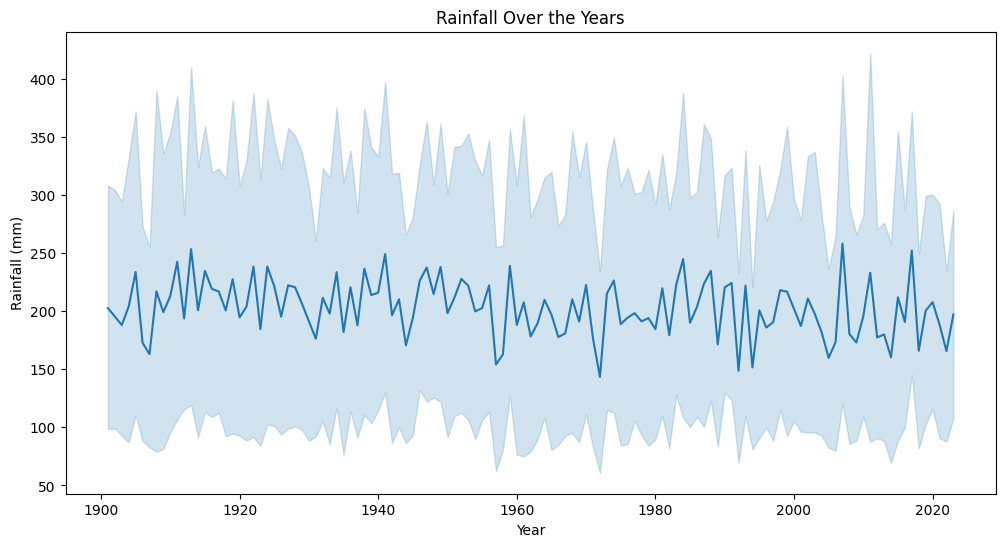

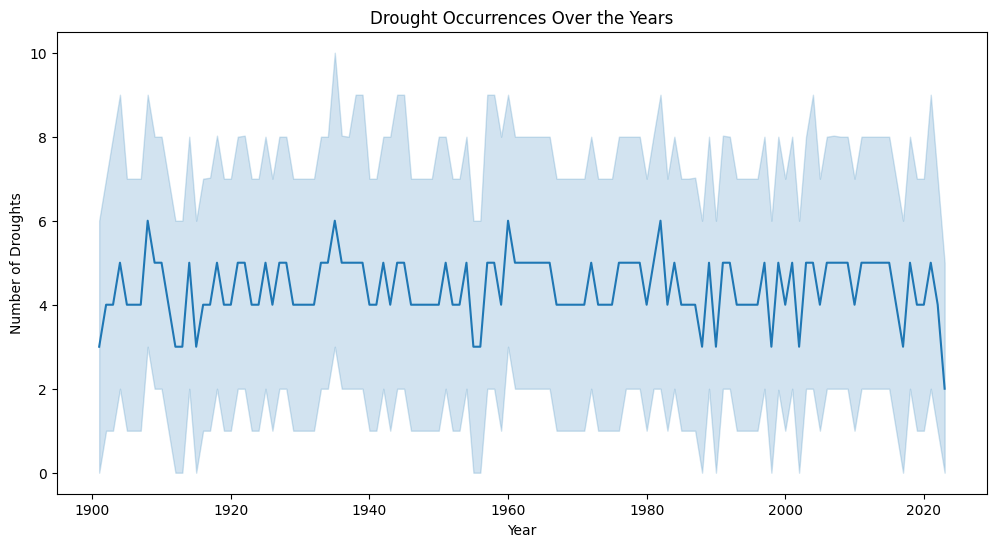

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rainfall over the years
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='rain', data=df)
plt.title('Rainfall Over the Years')
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
plt.show()

# Plot drought occurrences
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='drought', data=df, estimator='sum')
plt.title('Drought Occurrences Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Droughts')
plt.show()

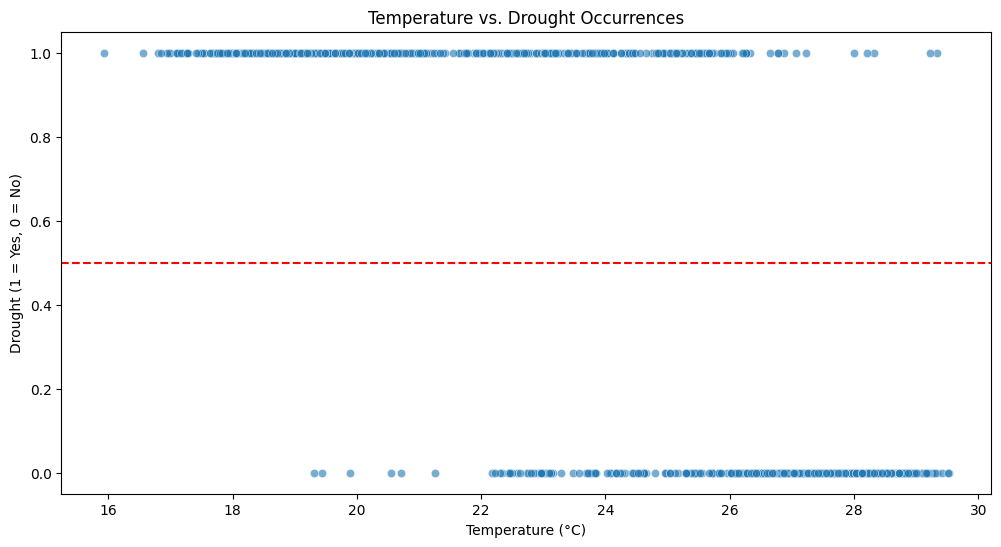

In [4]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='tem', y='drought', data=df, alpha=0.6)
plt.title('Temperature vs. Drought Occurrences')
plt.xlabel('Temperature (°C)')
plt.ylabel('Drought (1 = Yes, 0 = No)')
plt.axhline(0.5, color='red', linestyle='--')  # Threshold line for drought
plt.show()

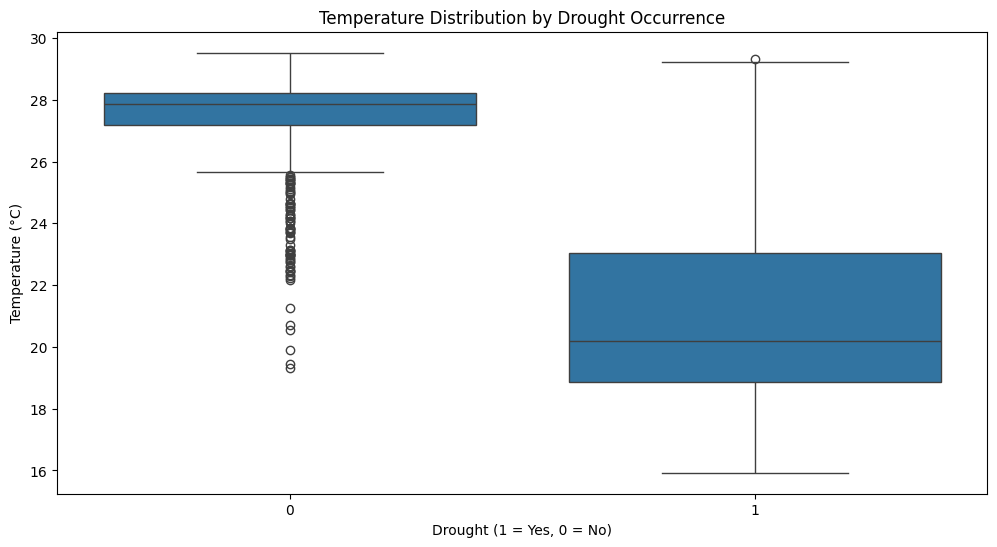

In [5]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='drought', y='tem', data=df)
plt.title('Temperature Distribution by Drought Occurrence')
plt.xlabel('Drought (1 = Yes, 0 = No)')
plt.ylabel('Temperature (°C)')
plt.show()

# New Section
modeling

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Select features and target variable
X = df[['tem', 'rain']]
y = df['drought']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[188   0]
 [  0 107]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       188
           1       1.00      1.00      1.00       107

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



training
future prediction

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import joblib

# Load the dataset
data = """tem,Month,Year,rain
16.976,1,1901,18.5356
19.9026,2,1901,16.2548
24.3158,3,1901,70.7981
28.1834,4,1901,66.1616
27.8892,5,1901,267.215
28.8925,6,1901,341.042
28.3327,7,1901,540.907
27.9243,8,1901,493.21
27.6057,9,1901,291.549
27.0887,10,1901,199.171
22.1671,11,1901,126.285
18.5574,12,1901,1.69035
18.5455,1,1902,1.29152
20.1252,2,1902,0.14722
25.5508,3,1902,62.7686
26.5562,4,1902,229.589
27.3165,5,1902,302.197
28.266,6,1902,528.775
27.6247,7,1902,415.257
28.1001,8,1902,435.166
27.7271,9,1902,282.872
26.0153,10,1902,76.6518
21.9907,11,1902,4.48053
18.2532,12,1902,6.51869
17.7023,1,1903,2.4001
19.5474,2,1903,16.7112
24.3562,3,1903,35.0165
28.0898,4,1903,79.8924
28.5913,5,1903,206.714
27.906,6,1903,606.088
28.6851,7,1903,376.786
27.5889,8,1903,401.075
27.7468,9,1903,288.777
26.8644,10,1903,190.116
22.4298,11,1903,53.8007
18.3745,12,1903,0.0104
17.7866,1,1904,0.3257
19.9656,2,1904,40.4723
25.0148,3,1904,32.017
27.3117,4,1904,169.242
27.1157,5,1904,317.756
27.8145,6,1904,525.691
27.4404,7,1904,707.404
27.9148,8,1904,367.376
27.9551,9,1904,181.867
26.2871,10,1904,72.9881
22.1525,11,1904,32.9518
18.7779,12,1904,1.97838
17,1,1905,7.07224
17.8269,2,1905,22.9071
22.9851,3,1905,78.9631
25.4188,4,1905,203.005
27.1236,5,1905,315.752
29.0868,6,1905,224.887
27.8607,7,1905,559.799
27.4862,8,1905,624.073
27.8164,9,1905,623.689
26.5021,10,1905,133.63
22.6873,11,1905,4.91701
18.6721,12,1905,7.61877
17.5423,1,1906,13.9546
19.4317,2,1906,65.6833
23.0485,3,1906,53.425
27.9907,4,1906,29.6299
28.4449,5,1906,229.508
28.2983,6,1906,357.968
28.3345,7,1906,487.922
27.4695,8,1906,388.641
28.3886,9,1906,212.273
26.428,10,1906,185.89
22.7998,11,1906,48.9485
19.2146,12,1906,0.01352
19.0642,1,1907,10.7854
19.7055,2,1907,28.6799
23.1507,3,1907,123.023
26.1498,4,1907,115.429
27.6634,5,1907,234.761
27.8377,6,1907,549.54
27.8421,7,1907,327.091
28.1978,8,1907,223.517
27.8996,9,1907,269.975
26.7797,10,1907,51.2185
22.7542,11,1907,9.41034
18.6971,12,1907,13.5853
17.2889,1,1908,7.99686
20.212,2,1908,12.5831
25.0639,3,1908,8.35921
29.3307,4,1908,44.7567
28.0869,5,1908,281.536
28.3117,6,1908,786.245
27.9535,7,1908,454.244
28.0517,8,1908,696.272
28.0101,9,1908,239.95
26.5604,10,1908,70.0824
22.174,11,1908,3.32205
18.3258,12,1908,0.06706
18.6933,1,1909,3.05691
20.1593,2,1909,5.51192
25.9954,3,1909,0.05684
26.4867,4,1909,297.624
27.9672,5,1909,209.147
27.2679,6,1909,732.781
28.1115,7,1909,353.252
27.414,8,1909,407.441
28.3398,9,1909,193.233
26.8933,10,1909,162.603
23.6615,11,1909,15.8119
19.1166,12,1909,10.6704
17.7787,1,1910,8.7212
19.9987,2,1910,23.461
24.3738,3,1910,42.3547
26.912,4,1910,118.086
27.8941,5,1910,266.631
27.3892,6,1910,547.481
27.3739,7,1910,767.513
27.8772,8,1910,306.786
28.2254,9,1910,273.808
26.2802,10,1910,177.51
22.3027,11,1910,25.508
18.1829,12,1910,0.04428
19.0692,1,1911,14.8878
19.6118,2,1911,5.67389
23.8229,3,1911,53.2531
26.9944,4,1911,120.237
27.6235,5,1911,326.943
27.5065,6,1911,605.515
28.14,7,1911,495.969
27.754,8,1911,737.185
27.7117,9,1911,383.276
26.023,10,1911,153.624
22.1109,11,1911,15.4586
17.7475,12,1911,0.00822
18.2763,1,1912,2.25106
20.9062,2,1912,29.7185
24.4209,3,1912,76.6334
26.0439,4,1912,162.34
27.7741,5,1912,280.501
28.3068,6,1912,432.564
27.6907,7,1912,468.194
27.7733,8,1912,334.72
27.9862,9,1912,185.82
26.2671,10,1912,218.287
22.3421,11,1912,130.107
18.3319,12,1912,4.99061
18.1365,1,1913,1.3331
20.7171,2,1913,52.7534
23.7257,3,1913,65.26
27.9796,4,1913,109.438
27.0109,5,1913,320.563
26.8354,6,1913,766.414
28.0541,7,1913,632.049
27.7176,8,1913,608.192
27.8885,9,1913,201.041
26.0772,10,1913,244.715
21.7421,11,1913,21.013
18.151,12,1913,19.4961
17.9978,1,1914,0.29132
20.6822,2,1914,33.7543
24.4306,3,1914,13.1223
25.8496,4,1914,227.216
27.4998,5,1914,354.499
27.9523,6,1914,522.397
28.0274,7,1914,624.896
27.5587,8,1914,358.844
27.6911,9,1914,195.451
25.4273,10,1914,55.233
22.4916,11,1914,8.40755
19.2066,12,1914,16.6593
18.8711,1,1915,5.29986
20.2688,2,1915,32.7776
24.1828,3,1915,81.4802
27.5293,4,1915,144.341
27.6441,5,1915,438.896
27.7751,6,1915,644.838
28.176,7,1915,604.175
28.1829,8,1915,423.692
27.7224,9,1915,247.244
28.1302,10,1915,140.361
24.4903,11,1915,52.6143
19.089,12,1915,0.92268
17.8694,1,1916,0.81033
20.4223,2,1916,7.77238
25.6592,3,1916,10.455
27.315,4,1916,330.499
28.9475,5,1916,197.267
27.6135,6,1916,603.185
27.5322,7,1916,276.94
27.8663,8,1916,437.713
28.052,9,1916,342.129
26.6718,10,1916,333.453
23.0187,11,1916,89.3188
18.2218,12,1916,2.12559
17.4937,1,1917,0.37143
19.8716,2,1917,37.7137
23.8486,3,1917,25.2565
26.9286,4,1917,149.653
27.1785,5,1917,307.686
27.4378,6,1917,570.203
27.777,7,1917,479.862
27.8983,8,1917,340.538
27.6864,9,1917,319.17
26.5464,10,1917,298.594
22.9189,11,1917,74.9472
18.5966,12,1917,0.08277
17.1998,1,1918,0.83205
20.0129,2,1918,4.45144
24.9119,3,1918,26.2286
26.6262,4,1918,186.424
27.6326,5,1918,300.067
26.4861,6,1918,583.023
28.2649,7,1918,506.578
27.4965,8,1918,478.53
28.0696,9,1918,230.131
26.5865,10,1918,83.0429
22.6765,11,1918,4.25047
18.4667,12,1918,5.10306
18.9095,1,1919,10.3983
19.706,2,1919,10.9028
25.8395,3,1919,7.77532
27.1635,4,1919,135.889
28.165,5,1919,350.062
28.0003,6,1919,429.508
27.7889,7,1919,316.506
28.3777,8,1919,806.554
27.3902,9,1919,527.605
26.4084,10,1919,77.1145
23.1173,11,1919,58.0797
18.9201,12,1919,1.20948
18.7317,1,1920,2.20118
19.8729,2,1920,25.7535
24.0729,3,1920,103.99
27.0365,4,1920,82.0514
27.7238,5,1920,273.926
28.6608,6,1920,434.396
28.4222,7,1920,462.428
27.8438,8,1920,519.612
27.968,9,1920,306.14
26.9096,10,1920,121.032
23.1647,11,1920,3.84201
19.6288,12,1920,0.70148
19.0034,1,1921,25.5379
20.4179,2,1921,6.73176
25.4407,3,1921,35.4543
27.5527,4,1921,280.166
28.8115,5,1921,168.951
27.7312,6,1921,559.224
28.1502,7,1921,563.936
27.9259,8,1921,452.636
28.1141,9,1921,239.818
25.4904,10,1921,102.363
22.401,11,1921,12.7244
19.1064,12,1921,1.9763
18.621,1,1922,6.28317
21.033,2,1922,2.50415
25.7471,3,1922,35.1278
28.5568,4,1922,89.4853
28.8271,5,1922,291.993
27.3527,6,1922,628.946
27.9223,7,1922,637.45
27.8164,8,1922,414.03
27.915,9,1922,658.105
25.9622,10,1922,90.2567
23.0288,11,1922,3.28945
19.0427,12,1922,5.05268
18.6312,1,1923,0.2034
19.8836,2,1923,51.6389
24.9515,3,1923,37.3254
27.8685,4,1923,225.583
28.1951,5,1923,217.668
28.7014,6,1923,375.707
27.8902,7,1923,264.157
28.1404,8,1923,741.587
28.085,9,1923,163.07
26.1335,10,1923,111.23
22.9939,11,1923,21.4818
19.4361,12,1923,5.71822
18.4881,1,1924,3.75275
20.5691,2,1924,10.9122
26.6422,3,1924,0.77195
28.7039,4,1924,109.904
28.2107,5,1924,258.384
29.0303,6,1924,642.036
27.8485,7,1924,572.381
27.8401,8,1924,683.449
27.397,9,1924,317.495
27.2626,10,1924,119.125
22.7645,11,1924,143.815
19.0319,12,1924,0.42203
16.9382,1,1925,7.44247
19.0482,2,1925,9.08182
24.7465,3,1925,18.3886
27.0765,4,1925,347.585
27.1711,5,1925,249.362
27.9974,6,1925,528.94
27.6439,7,1925,670.233
28.0744,8,1925,469.48
27.5406,9,1925,219.913
25.8388,10,1925,130.232
22.5173,11,1925,8.96177
18.4914,12,1925,0.20418
18.0436,1,1926,14.6215
20.7124,2,1926,8.2562
23.8361,3,1926,95.8359
26.692,4,1926,109.066
27.8134,5,1926,227.869
28.874,6,1926,277.9
27.8577,7,1926,796.267
27.9764,8,1926,341.633
28.0988,9,1926,258.316
26.6226,10,1926,179.601
21.9718,11,1926,9.40578
19.622,12,1926,25.1592
18.0251,1,1927,17.809
19.7421,2,1927,38.0801
23.1684,3,1927,28.5818
27.5302,4,1927,85.4605
27.4235,5,1927,260.88
28.3215,6,1927,675.394
28.2326,7,1927,656.572
27.9566,8,1927,457.57
27.6875,9,1927,272.553
26.8392,10,1927,150.797
22.7253,11,1927,24.6582
19.4851,12,1927,0
18.5036,1,1928,6.30357
21.1361,2,1928,10.4603
25.5137,3,1928,4.49918
27.8824,4,1928,133.607
27.8043,5,1928,311.074
27.5143,6,1928,586.373
27.978,7,1928,589.271
28.1385,8,1928,495.89
28.4182,9,1928,233.426
26.5972,10,1928,267.452
22.4865,11,1928,10.2458
19.461,12,1928,0.49404
18.3725,1,1929,16.7175
19.683,2,1929,3.23819
25.1633,3,1929,60.8157
27.4018,4,1929,168.841
28.3855,5,1929,242.222
28.2485,6,1929,539.79
27.9211,7,1929,611.303
27.8708,8,1929,332.066
27.9973,9,1929,250.144
26.2202,10,1929,240.915
22.3896,11,1929,6.37303
18.5883,12,1929,6.42947
17.1308,1,1930,5.29223
20.2585,2,1930,23.9319
24.836,3,1930,46.8843
27.5107,4,1930,73.9789
28.2023,5,1930,249.852
27.7208,6,1930,356.157
28.0704,7,1930,701.185
27.8828,8,1930,364.867
28.1845,9,1930,221.913
26.5011,10,1930,111.791
22.5794,11,1930,139.852
18.6454,12,1930,1.11792
19.2912,1,1931,2.36234
20.5581,2,1931,29.9072
24.6265,3,1931,58.5361
28.3371,4,1931,195.949
27.7868,5,1931,293.215
28.8507,6,1931,281.272
27.7335,7,1931,461.884
28.6073,8,1931,276.823
27.6722,9,1931,347.207
26.9166,10,1931,129.201
22.3272,11,1931,33.165
19.425,12,1931,6.29039
18.7903,1,1932,1.61393
19.2857,2,1932,21.3381
25.3485,3,1932,19.255
27.8492,4,1932,195.019
27.9615,5,1932,382.466
28.2926,6,1932,589.857
27.9526,7,1932,566.606
28.0368,8,1932,261.476
28.1666,9,1932,288.672
27.2559,10,1932,86.9181
23.2841,11,1932,119.142
19.3707,12,1932,6.31867
17.267,1,1933,10.6943
20.9302,2,1933,18.6183
25.4578,3,1933,4.25047
26.6786,4,1933,157.455
27.5726,5,1933,329.327
27.705,6,1933,429.113
27.8826,7,1933,610.431
27.7244,8,1933,411.573
28.0191,9,1933,221.405
26.7932,10,1933,175.592
22.5782,11,1933,4.34117
19.0815,12,1933,2.62996
17.9754,1,1934,7.59007
20.2944,2,1934,39.558
25.0594,3,1934,22.8781
27.9356,4,1934,133.701
28.2405,5,1934,326.382
27.5306,6,1934,371.785
28.1013,7,1934,575.555
28.0593,8,1934,316.366
28.4278,9,1934,747.339
26.2628,10,1934,223.748
22.1819,11,1934,32.3631
19.0272,12,1934,7.33182
17.6546,1,1935,4.94338
20.6904,2,1935,25.3281
25.3797,3,1935,20.2926
27.3559,4,1935,99.9117
29.3369,5,1935,156.903
28.5321,6,1935,552.279
28.4028,7,1935,373.398
27.5299,8,1935,633.872
28.0197,9,1935,250.749
26.8749,10,1935,47.22
23.2079,11,1935,17.8729
19.0876,12,1935,2.27944
17.6556,1,1936,5.30771
19.9519,2,1936,25.2687
25.6072,3,1936,23.6988
28.1323,4,1936,158.12
27.7471,5,1936,394.917
27.1586,6,1936,533.732
27.9088,7,1936,570.408
28.2978,8,1936,310.979
27.8549,9,1936,366.703
26.127,10,1936,228.993
23.7141,11,1936,7.66937
19.6911,12,1936,21.5583
17.1468,1,1937,0.0265
20.2496,2,1937,30.1397
24.3094,3,1937,5.98596
28.0696,4,1937,103.289
27.8123,5,1937,403.94
28.2435,6,1937,390.076
28.5889,7,1937,335.537
27.9099,8,1937,501.751
28.2349,9,1937,296.256
26.6222,10,1937,180.106
22.6849,11,1937,7.05839
19.1976,12,1937,1.35544
19.2664,1,1938,10.5036
19.4212,2,1938,11.8401
26.1933,3,1938,14.8106
29.1067,4,1938,69.324
27.2286,5,1938,465.273
27.6996,6,1938,717.301
27.7973,7,1938,547.367
28.1085,8,1938,614.125
28.5279,9,1938,220.827
27.2116,10,1938,122.557
21.8681,11,1938,46.7906
18.9308,12,1938,0.16198
18.9613,1,1939,1.57736
21.0936,2,1939,15.5098
24.8663,3,1939,15.5301
28.8783,4,1939,50.3976
28.411,5,1939,321.014
28.1074,6,1939,503.846
27.7214,7,1939,609.832
27.9175,8,1939,458.453
27.7891,9,1939,354.547
26.6052,10,1939,226.98
22.8798,11,1939,7.19556
19.4199,12,1939,2.27083
17.8246,1,1940,0.09005
20.392,2,1940,28.8248
23.1225,3,1940,123.366
27.9876,4,1940,188.578
27.9565,5,1940,356.941
28.3484,6,1940,459.402
27.8575,7,1940,345.623
28.2643,8,1940,651.6
27.9643,9,1940,291.108
27.0944,10,1940,134.946
23.9458,11,1940,4.54599
19.7315,12,1940,7.21845
18.4257,1,1941,9.50147
20.9764,2,1941,18.1531
26.2475,3,1941,11.294
28.4779,4,1941,243.23
28.3179,5,1941,327.274
27.7471,6,1941,783.675
28.1991,7,1941,460.039
28.3456,8,1941,578.413
28.1701,9,1941,222.544
26.4394,10,1941,264.913
22.4904,11,1941,69.0747
20.364,12,1941,3.15451
18.5173,1,1942,5.14758
20.887,2,1942,24.3795
25.4426,3,1942,39.3477
27.5847,4,1942,170.641
28.9374,5,1942,194.522
28.9074,6,1942,269.781
28.4444,7,1942,661.474
27.8112,8,1942,443.541
27.5892,9,1942,452.43
27.0809,10,1942,81.3453
23.8591,11,1942,16.4857
19.2302,12,1942,0.1343
19.4068,1,1943,29.3725
19.539,2,1943,25.4597
24.4346,3,1943,57.1202
26.0894,4,1943,333.39
28.1733,5,1943,208.787
27.9244,6,1943,442.53
27.8151,7,1943,522.932
27.7138,8,1943,509.659
28.1217,9,1943,323.417
27.0109,10,1943,64.8117
23.7047,11,1943,6.26408
20.2734,12,1943,0.82889
18.4048,1,1944,27.2062
20.1012,2,1944,15.227
25.0431,3,1944,42.1676
26.5521,4,1944,145.949
29.1642,5,1944,198.366
28.895,6,1944,460.273
28.2518,7,1944,408.849
28.3515,8,1944,429.219
27.9998,9,1944,230.536
26.8679,10,1944,88.1687
22.9212,11,1944,2.02702
20.3914,12,1944,0.35446
18.2015,1,1945,25.9673
19.3508,2,1945,17.3206
25.7198,3,1945,21.6969
27.5778,4,1945,171.733
27.8711,5,1945,309.845
28.6697,6,1945,383.063
28.3827,7,1945,451.998
28.2371,8,1945,358.178
28.5058,9,1945,297.065
26.2761,10,1945,284.818
22.875,11,1945,8.55173
18.7336,12,1945,0.81369
18.7904,1,1946,0.81116
22.2759,2,1946,16.2432
25.2807,3,1946,51.7841
26.1737,4,1946,267.018
27.7316,5,1946,270.761
27.8769,6,1946,425.059
27.7379,7,1946,395.186
28.3153,8,1946,538.033
28.0705,9,1946,412.309
26.1231,10,1946,297.256
23.7298,11,1946,43.8025
20.0773,12,1946,0.08892
18.4592,1,1947,2.18307
20.8343,2,1947,5.67583
25.3178,3,1947,69.8127
28.6075,4,1947,107.859
28.4113,5,1947,356.112
28.5211,6,1947,442.622
28.12,7,1947,631.931
28.0557,8,1947,446.662
28.0439,9,1947,497.411
26.1121,10,1947,261.153
23.1268,11,1947,1.08203
20.073,12,1947,30.1635
18.8595,1,1948,4.94443
20.5453,2,1948,53.1801
24.3332,3,1948,41.4551
27.3178,4,1948,265.178
27.2727,5,1948,338.362
28.3304,6,1948,383.859
27.6623,7,1948,428.44
27.9189,8,1948,504.491
28.1084,9,1948,273.255
26.2712,10,1948,238.586
23.4262,11,1948,45.6929
18.6645,12,1948,0.34566
18.691,1,1949,8.43542
20.196,2,1949,11.1358
24.974,3,1949,66.8256
25.4455,4,1949,325.503
26.6293,5,1949,397.104
27.9464,6,1949,528.721
27.7579,7,1949,575.004
27.877,8,1949,448.978
27.8519,9,1949,364.827
27.2007,10,1949,124.113
22.2315,11,1949,7.79009
17.6854,12,1949,0.24329
18.5486,1,1950,0.95331
20.1997,2,1950,37.1688
24.4553,3,1950,36.8968
27.7109,4,1950,77.3122
28.4808,5,1950,208.921
27.8493,6,1950,562.629
27.7724,7,1950,429.562
27.3795,8,1950,516.673
28.1418,9,1950,204.392
26.6353,10,1950,194.603
22.3076,11,1950,110.718
19.193,12,1950,0.81345
17.7884,1,1951,1.46508
20.5543,2,1951,0.0057
24.8184,3,1951,48.0227
27.2714,4,1951,134.69
28.2118,5,1951,201.181
28.0756,6,1951,424.819
27.7922,7,1951,639.217
28.3824,8,1951,461.463
28.1077,9,1951,326.631
27.2955,10,1951,261.506
23.2622,11,1951,38.4084
20.3254,12,1951,2.73628
18.9548,1,1952,2.819
21.9137,2,1952,2.5095
24.0828,3,1952,58.8997
27.0739,4,1952,255.301
27.5969,5,1952,288.571
28.4238,6,1952,504.859
27.7268,7,1952,603.285
28.033,8,1952,342.201
27.7437,9,1952,352.395
26.9695,10,1952,273.719
23.0584,11,1952,49.1966
19.0419,12,1952,1.43815
17.715,1,1953,13.7329
21.4254,2,1953,7.78775
26.0308,3,1953,64.1822
28.252,4,1953,114.384
28.0526,5,1953,317.316
27.7573,6,1953,543.459
27.7162,7,1953,652.124
28.1521,8,1953,397.148
27.7436,9,1953,415.956
26.4653,10,1953,119.564
22.6183,11,1953,17.1858
20.5814,12,1953,0.75467
17.2898,1,1954,15.6634
22.1992,2,1954,20.5793
25.2363,3,1954,23.3158
29.126,4,1954,91.1713
28.893,5,1954,250.974
27.2109,6,1954,683.143
27.8235,7,1954,466.429
28.0071,8,1954,450.3
28.1271,9,1954,212.264
25.7316,10,1954,177.784
21.666,11,1954,0.14087
19.3207,12,1954,6.70821
17.988,1,1955,4.17168
20.2242,2,1955,2.55556
25.517,3,1955,63.0167
27.234,4,1955,117.456
28.6394,5,1955,214.981
28.1113,6,1955,477.064
27.3639,7,1955,548.997
27.6166,8,1955,451.5
27.976,9,1955,265.446
27.0494,10,1955,171.876
23.0927,11,1955,115.431
18.576,12,1955,0.82756
18.2806,1,1956,12.145
19.802,2,1956,4.21711
25.3792,3,1956,83.9227
27.949,4,1956,118.754
28.0995,5,1956,287.922
27.1197,6,1956,595.058
27.6612,7,1956,483.284
27.9301,8,1956,510.976
27.6135,9,1956,338.255
26.8891,10,1956,173.323
22.9846,11,1956,55.2849
19.3905,12,1956,4.08725
18.6476,1,1957,21.3908
19.5143,2,1957,27.3864
24.0236,3,1957,12.6682
28.3691,4,1957,68.7759
29.2739,5,1957,129.986
28.4367,6,1957,412.538
28.0674,7,1957,527.145
28.4941,8,1957,339.035
28.1995,9,1957,230.859
26.4778,10,1957,78.5405
22.6556,11,1957,0.52471
19.6706,12,1957,1.44234
19.7673,1,1958,4.36869
20.7237,2,1958,31.3106
25.5715,3,1958,18.0814
28.5818,4,1958,137.765
28.8361,5,1958,214.459
29.4177,6,1958,226.438
28.4789,7,1958,401.132
27.9477,8,1958,476.307
28.3228,9,1958,268.075
27.4873,10,1958,166.99
23.6633,11,1958,6.81405
20.1148,12,1958,2.76849
18.5213,1,1959,25.2933
19.8572,2,1959,20.4774
24.6577,3,1959,83.1661
28.165,4,1959,122.485
28.2968,5,1959,359.432
28.168,6,1959,465.967
28.0668,7,1959,443.91
27.9072,8,1959,553.256
27.3399,9,1959,388.106
26.1549,10,1959,402.994
22.3988,11,1959,0.19915
19.419,12,1959,4.4506
18.0893,1,1960,0.03981
22.1152,2,1960,0.97754
23.957,3,1960,47.3186
29.2185,4,1960,27.0602
29.2217,5,1960,250.843
28.6191,6,1960,360.87
27.5236,7,1960,669.317
28.4533,8,1960,347.803
27.8695,9,1960,389.229
26.882,10,1960,134.597
22.4092,11,1960,29.934
19.7958,12,1960,0.58055
19.0652,1,1961,6.16273
19.0658,2,1961,22.7065
26.0556,3,1961,22.3121
28.555,4,1961,87.3954
28.4711,5,1961,192.679
27.9452,6,1961,972.536
28.0834,7,1961,294.587
28.2561,8,1961,510.77
27.8613,9,1961,208.662
26.8185,10,1961,169.7
22.0269,11,1961,5.16209
17.5351,12,1961,0.60981
17.0844,1,1962,8.66949
20.6306,2,1962,22.2978
25.1073,3,1962,6.04963
28.0974,4,1962,95.3012
27.9313,5,1962,319.335
27.9382,6,1962,399.432
28.6468,7,1962,509.042
27.8838,8,1962,401.382
28.3854,9,1962,207.679
26.4392,10,1962,170.023
22.4533,11,1962,0.1717
19.1662,12,1962,0.7377
17.7822,1,1963,0.58449
21.9651,2,1963,0.9191
24.9482,3,1963,33.631
26.9333,4,1963,117.506
27.1739,5,1963,272.534
27.9536,6,1963,459.493
28.0948,7,1963,572.234
28.296,8,1963,299.125
28.4266,9,1963,266.525
26.5765,10,1963,238.534
22.9553,11,1963,13.3191
19.7094,12,1963,0.78731
17.9709,1,1964,5.94211
21.1238,2,1964,19.8919
26.2558,3,1964,24.7424
27.2635,4,1964,213.125
27.8866,5,1964,238.66
28.2793,6,1964,502.621
27.3133,7,1964,569.584
28.2281,8,1964,326.531
28.1808,9,1964,270.624
27.1473,10,1964,316.161
23.5157,11,1964,29.8628
19.7899,12,1964,0.15303
18.6764,1,1965,0.27337
20.4685,2,1965,37.1055
23.8589,3,1965,37.4934
27.4561,4,1965,52.9001
28.676,5,1965,192.222
28.0528,6,1965,448.92
27.5588,7,1965,602.78
27.1909,8,1965,556.13
27.7401,9,1965,286.953
26.5774,10,1965,102.255
23.1994,11,1965,33.2288
19.7873,12,1965,14.7019
18.4824,1,1966,15.4377
22.1565,2,1966,0.87698
25.1246,3,1966,22.8879
28.5128,4,1966,53.478
29.1766,5,1966,183.664
27.728,6,1966,423.554
28.2117,7,1966,429.89
27.9247,8,1966,456.18
27.6962,9,1966,318.377
25.7202,10,1966,175.73
23.7204,11,1966,23.6765
19.1252,12,1966,29.1764
18.6105,1,1967,24.1993
21.2856,2,1967,3.72153
23.8405,3,1967,95.0896
26.5681,4,1967,145.831
28.1967,5,1967,197.062
28.1625,6,1967,318.576
28.075,7,1967,511.037
27.9847,8,1967,377.757
27.4322,9,1967,363.87
26.1048,10,1967,132.535
21.6477,11,1967,2.10312
19.6023,12,1967,0.45729
17.9779,1,1968,8.01219
19.643,2,1968,7.75839
24.9615,3,1968,53.2339
27.1675,4,1968,107.727
28.0834,5,1968,267.954
26.9702,6,1968,800.141
27.7856,7,1968,511.001
28.0264,8,1968,415.247
28.4405,9,1968,199.112
26.4382,10,1968,128.784
23.1298,11,1968,23.7808
19.5489,12,1968,1.31776
17.8455,1,1969,3.66924
21.0472,2,1969,0.74622
25.8095,3,1969,90.9436
27.8697,4,1969,157.083
28.6643,5,1969,125.659
28.1842,6,1969,416.228
28.131,7,1969,543.448
27.3112,8,1969,539.158
28.0775,9,1969,324.491
26.4501,10,1969,66.7082
23.2061,11,1969,25.0749
19.5562,12,1969,0.59785
17.8687,1,1970,16.7087
20.8429,2,1970,16.3557
25.1381,3,1970,30.2124
28.1814,4,1970,88.686
28.8184,5,1970,153.278
28.1102,6,1970,636.673
27.7758,7,1970,550.896
28.0489,8,1970,421.068
27.7837,9,1970,404.488
26.3453,10,1970,296.902
22.8516,11,1970,55.8865
19.17,12,1970,0.05075
18.1881,1,1971,11.8691
19.7759,2,1971,6.31247
24.4476,3,1971,8.55389
26.2185,4,1971,69.8946
27.4486,5,1971,147.566
27.438,6,1971,363.691
27.1886,7,1971,517.82
26.9405,8,1971,478.907
27.8165,9,1971,279.091
26.6511,10,1971,160.661
22.2256,11,1971,71.9736
19.3208,12,1971,0.2358
18.7213,1,1972,1.34663
18.6849,2,1972,26.5107
25.0857,3,1972,25.2717
27.1956,4,1972,104.872
29.0864,5,1972,155.076
28.2846,6,1972,317.996
28.3326,7,1972,375.331
27.4792,8,1972,424.779
28.1104,9,1972,199.335
26.6273,10,1972,87.8432
23.1532,11,1972,2.57908
19.4455,12,1972,0.02066
18.8691,1,1973,4.79803
21.9105,2,1973,31.0566
24.1362,3,1973,46.4803
28.5821,4,1973,111.753
27.042,5,1973,492.833
27.8315,6,1973,478.214
28.2071,7,1973,430.427
27.9847,8,1973,287.732
27.6703,9,1973,384.063
26.7585,10,1973,174.955
22.9698,11,1973,96.3741
19.0137,12,1973,44.2418
17.631,1,1974,5.48967
20.1513,2,1974,0.04505
24.6152,3,1974,118.325
27.2181,4,1974,148.729
27.6897,5,1974,333.845
27.8498,6,1974,382.049
27.0471,7,1974,780.355
27.9089,8,1974,375.054
27.4488,9,1974,334.658
27.6097,10,1974,219.244
24.1236,11,1974,20.3715
18.2645,12,1974,0.7203
18.0454,1,1975,2.66038
20.7283,2,1975,12.4828
25.4553,3,1975,12.8183
28.2002,4,1975,94.5976
28.0144,5,1975,251.874
28.3837,6,1975,338.62
27.1209,7,1975,682.34
27.9833,8,1975,279.506
27.5182,9,1975,343.686
27.4014,10,1975,195.543
22.4417,11,1975,51.6203
18.307,12,1975,0.85572
18.3264,1,1976,1.18694
21.1868,2,1976,17.157
25.5237,3,1976,31.1362
27.7962,4,1976,81.9646
27.4224,5,1976,284.795
27.5163,6,1976,652.306
27.8497,7,1976,473.475
27.3903,8,1976,435.298
27.8908,9,1976,215.449
26.592,10,1976,98.277
24.3715,11,1976,41.4419
19.1128,12,1976,2.1749
17.9541,1,1977,3.89109
20.3662,2,1977,33.824
26.3199,3,1977,25.9827
26.1722,4,1977,304.988
26.4029,5,1977,329.388
27.1542,6,1977,490.912
27.9848,7,1977,514.169
28.1256,8,1977,287.439
28.3048,9,1977,184.801
26.0245,10,1977,149.403
23.717,11,1977,35.8673
19.1805,12,1977,19.7034
16.8006,1,1978,0.6893
20.2042,2,1978,7.28948
24.0473,3,1978,25.2145
27.0655,4,1978,137.157
27.3758,5,1978,363.313
27.4932,6,1978,488.343
27.9215,7,1978,425.095
28.6085,8,1978,359.019
27.6907,9,1978,372.462
27.517,10,1978,107.964
24.0292,11,1978,8.64631
19.7649,12,1978,0.58537
19.1725,1,1979,11.8392
20.0549,2,1979,15.3143
24.9246,3,1979,20.5132
28.2364,4,1979,80.0346
29.526,5,1979,116.378
28.8,6,1979,425.375
28.2819,7,1979,526.512
28.2275,8,1979,536.167
28.0401,9,1979,417.903
26.9451,10,1979,113.73
25.1142,11,1979,25.5128
20.0687,12,1979,40.2626
18.2739,1,1980,3.3678
20.6525,2,1980,42.1885
25.0401,3,1980,60.7095
28.7934,4,1980,74.1954
27.1723,5,1980,347.529
28.2177,6,1980,340.656
28.1036,7,1980,516.119
28.1573,8,1980,395.61
28.396,9,1980,246.292
26.4103,10,1980,185.85
23.3395,11,1980,1.61647
20.3604,12,1980,0.85529
18.3163,1,1981,23.5086
20.644,2,1981,27.508
24.1726,3,1981,86.7601
25.7174,4,1981,378.903
27.1297,5,1981,326.596
28.551,6,1981,405.931
27.6783,7,1981,679.557
28.462,8,1981,376.863
27.9154,9,1981,264.709
27.2273,10,1981,22.197
23.4404,11,1981,1.09602
19.0389,12,1981,44.4069
18.9885,1,1982,0.37417
20.5124,2,1982,21.1194
23.7499,3,1982,39.1975
26.815,4,1982,179.316
28.9711,5,1982,166.775
27.9965,6,1982,413.265
28.5086,7,1982,420.955
27.9058,8,1982,544.534
28.1703,9,1982,284.621
27.0648,10,1982,39.4172
22.5962,11,1982,38.9091
18.8501,12,1982,3.49806
18.0039,1,1983,11.3977
19.7179,2,1983,36.6821
24.6127,3,1983,104.064
26.9736,4,1983,191.055
27.4698,5,1983,377.107
28.7935,6,1983,396.943
28.5904,7,1983,434.307
28.1526,8,1983,484.295
28.1086,9,1983,305.01
27.015,10,1983,280.982
23.8313,11,1983,19.5985
18.8622,12,1983,32.1243
17.7947,1,1984,15.9246
19.9473,2,1984,4.05208
25.536,3,1984,9.63009
28.2474,4,1984,172.021
27.654,5,1984,507.684
27.886,6,1984,565.81
27.7393,7,1984,715.063
28.1933,8,1984,427.289
27.4938,9,1984,381.452
27.5528,10,1984,129.73
23.0039,11,1984,4.52029
19.6511,12,1984,6.63063
18.8171,1,1985,7.44035
20.6197,2,1985,10.7857
26.2622,3,1985,95.98
28.3044,4,1985,119.024
27.6409,5,1985,325.358
28.2298,6,1985,498.385
27.3083,7,1985,409.884
28.3917,8,1985,359.347
27.8588,9,1985,325.074
27.0872,10,1985,97.375
23.0949,11,1985,26.3739
20.4398,12,1985,5.6936
18.8875,1,1986,5.97641
21.0747,2,1986,2.43015
25.6098,3,1986,17.3861
27.0516,4,1986,179.735
27.6381,5,1986,210.662
28.897,6,1986,296.929
27.8074,7,1986,571.737
28.4925,8,1986,304.698
27.3405,9,1986,460.341
26.1029,10,1986,252.867
23.6914,11,1986,135.81
20.0478,12,1986,6.83946
18.9032,1,1987,3.04431
21.7238,2,1987,9.38784
24.8017,3,1987,57.131
27.4476,4,1987,210.204
28.508,5,1987,137.362
29.253,6,1987,521.268
28.0107,7,1987,589.099
28.1384,8,1987,634.122
28.2602,9,1987,357.247
27.3458,10,1987,119.269
24.2419,11,1987,29.0261
20.36,12,1987,15.8961
19.2634,1,1988,0.87756
21.7809,2,1988,31.1986
25.117,3,1988,70.323
28.2212,4,1988,205.354
27.9454,5,1988,418.672
28.0714,6,1988,517.33
28.1468,7,1988,546.468
28.1171,8,1988,479.413
28.5791,9,1988,281.161
27.4519,10,1988,164.222
24.2705,11,1988,91.5198
21.0501,12,1988,12.0457
17.5061,1,1989,2.88141
20.8075,2,1989,18.6473
25.0341,3,1989,15.3381
28.4778,4,1989,93.4202
29.0168,5,1989,287.091
28.2459,6,1989,370.973
28.1345,7,1989,480.33
28.5109,8,1989,176.275
28.1385,9,1989,333.963
27.0998,10,1989,270.976
23.3839,11,1989,3.81756
19.0009,12,1989,4.31961
19.473,1,1990,1.02665
21.1088,2,1990,45.7316
23.7713,3,1990,104.692
26.5503,4,1990,222.121
28.0107,5,1990,278.321
28.5531,6,1990,521.461
27.9207,7,1990,522.194
28.5019,8,1990,358.344
28.2556,9,1990,294.101
26.2772,10,1990,225.056
24.5595,11,1990,57.4948
20.1132,12,1990,15.7285
17.4518,1,1991,15.5629
21.7874,2,1991,28.323
25.9068,3,1991,41.9833
27.3361,4,1991,195.31
27.5258,5,1991,355.596
27.6036,6,1991,411.503
28.1626,7,1991,412.073
28.0767,8,1991,404.229
27.4425,9,1991,514.93
26.5558,10,1991,263.402
22.5562,11,1991,21.6794
18.5561,12,1991,28.904
17.4191,1,1992,6.15095
19.3065,2,1992,50.8807
25.1958,3,1992,9.63505
28.3228,4,1992,38.8075
27.3386,5,1992,207.565
28.3549,6,1992,273.337
27.6078,7,1992,462.745
28.0492,8,1992,318.474
27.7278,9,1992,272.882
26.5026,10,1992,135.043
23.0168,11,1992,6.02325
18.2444,12,1992,2.99477
18.1609,1,1993,9.06548
21.0757,2,1993,47.1214
23.4808,3,1993,87.7526
26.4466,4,1993,135.085
27.0991,5,1993,404.466
27.6713,6,1993,519.834
27.8916,7,1993,484.528
27.867,8,1993,458.954
27.4283,9,1993,356.76
26.6738,10,1993,143.515
23.2391,11,1993,18.7967
19.9446,12,1993,0.01082
18.7418,1,1994,13.981
19.7401,2,1994,27.5964
25.03,3,1994,89.831
27.1263,4,1994,164.774
28.5911,5,1994,204.148
28.0515,6,1994,373.326
28.3919,7,1994,317.352
28.3,8,1994,361.903
28.3021,9,1994,166.025
26.7137,10,1994,91.0517
23.1254,11,1994,9.18975
19.0129,12,1994,0.14889
17.7492,1,1995,9.51787
20.8723,2,1995,29.6508
25.2876,3,1995,21.9067
28.5657,4,1995,53.7673
29.2967,5,1995,212.226
28.8511,6,1995,410.046
27.984,7,1995,585.233
28.1941,8,1995,494.813
27.9357,9,1995,371.108
27.2994,10,1995,79.6197
23.7156,11,1995,140.99
19.1235,12,1995,1.21624
18.5789,1,1996,7.05748
20.6901,2,1996,22.9102
26.0952,3,1996,52.8844
27.8947,4,1996,166.541
28.6148,5,1996,232.497
28.0299,6,1996,397.807
28.1341,7,1996,436.68
27.7894,8,1996,386.234
28.2475,9,1996,258.422
26.6539,10,1996,263.608
23.5364,11,1996,6.52539
19.4872,12,1996,0.41104
17.9503,1,1997,9.95175
19.7434,2,1997,21.4791
25.302,3,1997,69.1094
25.8287,4,1997,148.762
28.2268,5,1997,205.94
28.2152,6,1997,438.014
28.0691,7,1997,525.725
28.2508,8,1997,381.913
27.6086,9,1997,398.26
26.2579,10,1997,45.9865
23.9015,11,1997,11.493
18.8273,12,1997,31.8516
17.7704,1,1998,19.5979
21.3817,2,1998,33.4868
23.833,3,1998,104.975
27.4558,4,1998,191.096
28.848,5,1998,228.972
29.2008,6,1998,368.339
28.1453,7,1998,651.001
28.2394,8,1998,468.56
28.6324,9,1998,274.832
28.6631,10,1998,174.975
24.228,11,1998,102.414
19.9801,12,1998,0.02981
18.9055,1,1999,0.3407
22.7454,2,1999,0.10675
26.2573,3,1999,5.22216
29.5091,4,1999,50.6288
27.9702,5,1999,322.274
28.5738,6,1999,338.123
27.9209,7,1999,800.869
27.8719,8,1999,453.255
27.7741,9,1999,340.816
27.2434,10,1999,272.28
23.7157,11,1999,12.5447
20.4159,12,1999,5.91518
17.8553,1,2000,20.0385
19.8796,2,2000,26.8679
24.1766,3,2000,76.7595
26.9379,4,2000,202.779
27.5459,5,2000,439.359
28.1653,6,2000,366.512
28.2621,7,2000,356.645
28.1104,8,2000,429.486
27.5094,9,2000,320.606
27.0526,10,2000,181.583
23.7323,11,2000,5.0709
19.4021,12,2000,0.21109
19.1684,1,2001,1.05632
22.1418,2,2001,8.84245
25.2322,3,2001,31.1425
28.0317,4,2001,113.584
28.0056,5,2001,385.625
27.9112,6,2001,437.875
28.1778,7,2001,355.399
28.4513,8,2001,394.333
28.6358,9,2001,247.686
27.4927,10,2001,250.576
24.3786,11,2001,21.9283
20.0203,12,2001,0.00843
18.7662,1,2002,16.0598
21.7798,2,2002,1.62475
25.6658,3,2002,54.9691
27.3997,4,2002,203.641
27.9866,5,2002,164.443
28.2914,6,2002,622.822
27.8864,7,2002,615.753
27.9693,8,2002,380.547
28.0888,9,2002,258.746
26.9426,10,2002,84.9505
24.0238,11,2002,127.723
20.2395,12,2002,0.62698
17.9398,1,2003,4.05949
20.9849,2,2003,13.9698
24.4467,3,2003,46.4431
28.153,4,2003,103.609
28.1068,5,2003,229.51
28.1032,6,2003,470.844
28.2792,7,2003,747.537
28.8776,8,2003,199.356
28.7275,9,2003,227.284
27.7419,10,2003,270.92
23.9283,11,2003,34.4858
19.2162,12,2003,25.0712
18.2838,1,2004,3.8527
20.9799,2,2004,3.20108
26.7782,3,2004,36.3113
27.3832,4,2004,226.008
29.1106,5,2004,202.54
28.3582,6,2004,539.037
27.6765,7,2004,319.079
28.5187,8,2004,244.488
28.2945,9,2004,247.653
26.3711,10,2004,345.506
23.2019,11,2004,6.17463
20.5304,12,2004,6.5125
18.7742,1,2005,13.6412
22.0334,2,2005,6.00206
25.8596,3,2005,73.5596
27.9591,4,2005,146.875
28.0449,5,2005,257.578
29.1435,6,2005,263.16
28.2297,7,2005,409.154
28.597,8,2005,220.255
28.3883,9,2005,282.964
26.9262,10,2005,236.316
23.3981,11,2005,5.77824
20.1779,12,2005,2.564
19.4921,1,2006,0.00249
23.6292,2,2006,6.08321
26.212,3,2006,7.92641
27.6793,4,2006,341.871
28.4904,5,2006,199.635
28.458,6,2006,274.958
28.6736,7,2006,428.041
28.6002,8,2006,320.256
28.5336,9,2006,361.797
27.4515,10,2006,112.708
23.9783,11,2006,24.2999
20.7727,12,2006,2.98989
19.093,1,2007,1.04976
20.5513,2,2007,46.5265
25.1484,3,2007,15.9467
28.0036,4,2007,312.651
28.793,5,2007,180.555
28.5409,6,2007,481.578
28.1274,7,2007,496.747
28.8106,8,2007,898.072
28.3902,9,2007,396.955
27.8778,10,2007,229.974
24.1285,11,2007,39.532
20.1536,12,2007,0.10678
19.1005,1,2008,22.6256
19.783,2,2008,12.5362
25.6679,3,2008,38.8424
28.4216,4,2008,101.169
28.5943,5,2008,206.353
27.8427,6,2008,477.063
28.0989,7,2008,588.575
28.1792,8,2008,311.883
28.5522,9,2008,235.861
27.0175,10,2008,160.93
23.7862,11,2008,6.53971
21.0141,12,2008,2.27446
20.3262,1,2009,0.65574
22.7193,2,2009,16.0921
25.9696,3,2009,26.2234
29.1815,4,2009,199.444
28.5577,5,2009,209.835
29.1754,6,2009,224.577
28.8393,7,2009,558.314
28.5917,8,2009,317.717
28.964,9,2009,298.646
27.6979,10,2009,171.9
24.4304,11,2009,49.8057
20.2116,12,2009,3.71126
18.6795,1,2010,0.02014
21.7631,2,2010,4.31731
27.0261,3,2010,98.9955
29.1543,4,2010,283.174
28.8466,5,2010,274.778
28.723,6,2010,451.158
28.7615,7,2010,358.158
28.9236,8,2010,293.918
28.6092,9,2010,349.922
27.9208,10,2010,207.224
25.1333,11,2010,8.98786
19.8122,12,2010,17.4939
18.0523,1,2011,4.69858
21.2404,2,2011,20.0933
25.5009,3,2011,23.1504
27.67,4,2011,89.8199
28.2986,5,2011,258.967
28.5389,6,2011,626.279
28.2877,7,2011,414.579
28.0651,8,2011,1012.02
28.4788,9,2011,275.258
27.474,10,2011,52.3823
23.5306,11,2011,19.8951
20.4366,12,2011,0.95423
16.8493,1,2012,17.7638
20.0185,2,2012,2.89884
25.6603,3,2012,49.1879
26.6947,4,2012,204.675
28.7705,5,2012,237.962
28.5034,6,2012,283.547
28.0643,7,2012,494.22
28.4723,8,2012,388.252
27.879,9,2012,245.315
26.1542,10,2012,166.98
23.0322,11,2012,21.3492
19.6466,12,2012,16.9888
17.7546,1,2013,1.14107
20.6546,2,2013,11.6018
25.3696,3,2013,9.01275
27.366,4,2013,115.73
27.2544,5,2013,307.156
28.894,6,2013,357.403
28.3869,7,2013,473.361
27.8884,8,2013,395.807
28.0005,9,2013,234.519
26.4168,10,2013,254.758
22.1847,11,2013,0.00089
18.5529,12,2013,0.57815
17.1088,1,2014,0.1202
19.2051,2,2014,32.3783
24.4777,3,2014,11.8894
28.5882,4,2014,53.5327
28.7169,5,2014,179.551
28.2088,6,2014,372.435
28.5261,7,2014,403.483
27.9512,8,2014,481.268
27.9355,9,2014,330.746
26.6371,10,2014,57.4383
22.6934,11,2014,0.22844
18.3739,12,2014,0.30376
17.8343,1,2015,8.75886
20.3632,2,2015,24.1695
24.6581,3,2015,21.2529
26.3966,4,2015,198.791
28.3603,5,2015,167.221
28.2169,6,2015,450.405
27.8557,7,2015,715.223
28.0642,8,2015,512.127
28.123,9,2015,353.869
26.8624,10,2015,81.5994
23.1842,11,2015,4.60815
18.7124,12,2015,5.97798
17.83483871,1,2016,7.336310769
22.40862069,2,2016,15.03498205
26.77322581,3,2016,43.6432441
27.56633333,4,2016,103.8363908
27.95225806,5,2016,235.2907805
28.40166667,6,2016,318.1608764
28.23709677,7,2016,492.8279933
28.57387097,8,2016,399.8895974
27.785,9,2016,350.3153092
26.87774194,10,2016,219.9941272
22.73366667,11,2016,96.75129897
20.06709677,12,2016,5.324735385
18.44193548,1,2017,4.938625641
21.34428571,2,2017,7.273871795
23.56709677,3,2017,63.13590974
26.34266667,4,2017,155.1185692
28.31677419,5,2017,272.1865513
28.195,6,2017,422.5002903
28.31548387,7,2017,582.5574785
28.42483871,8,2017,601.4947605
28.09966667,9,2017,385.7137892
26.4183871,10,2017,353.6878185
22.617,11,2017,154.0852415
19.87064516,12,2017,25.4336441
15.92516129,1,2018,7.66066
20.2325,2,2018,12.38131487
24.84580645,3,2018,24.04337538
26.59866667,4,2018,128.0920277
27.35129032,5,2018,265.839779
28.36333333,6,2018,374.8318718
28.95709677,7,2018,384.9185349
28.76580645,8,2018,383.4374933
28.10733333,9,2018,241.4163585
25.3,10,2018,130.1385277
21.54933333,11,2018,29.99348462
18.19806452,12,2018,8.605092821
17.83806452,1,2019,6.183647179
20.5975,2,2019,19.34440462
24.24290323,3,2019,48.39384769
27.63233333,4,2019,176.6482282
28.55032258,5,2019,203.7184164
28.82266667,6,2019,295.2398169
28.51967742,7,2019,576.6793236
28.99580645,8,2019,458.8436333
28.02333333,9,2019,313.2523944
26.07741935,10,2019,212.4899369
22.799,11,2019,87.72067949
17.79290323,12,2019,7.071553333
16.56096774,1,2020,23.14484615
18.84965517,2,2020,12.15694154
24.55709677,3,2020,29.13098103
27.41266667,4,2020,95.93577179
27.98741935,5,2020,251.9694026
28.03466667,6,2020,423.5050123
28.39,7,2020,454.5180128
28.50870968,8,2020,400.6286646
28.28266667,9,2020,368.9304974
27.60580645,10,2020,306.9738928
22.96566667,11,2020,119.1806113
17.90967742,12,2020,8.097425641
17.17032258,1,2021,4.931574359
20.16,2,2021,6.809094872
25.93741935,3,2021,20.8965959
28.20333333,4,2021,39.38604821
28.14225806,5,2021,186.0316862
28.03,6,2021,432.2483667
28.60774194,7,2021,414.5549221
28.20225806,8,2021,469.0759138
28.23666667,9,2021,336.5119544
26.67870968,10,2021,252.3137051
21.25333333,11,2021,71.93205744
18.85451613,12,2021,29.21446051
17.2616129,1,2022,10.74073385
18.04785714,2,2022,27.99829179
25.85096774,3,2022,23.93084821
28.13133333,4,2022,59.57292051
28.11935484,5,2022,191.4402395
27.546,6,2022,397.1144554
28.72032258,7,2022,270.4946974
28.85903226,8,2022,296.7719287
27.84533333,9,2022,318.4332221
26.13451613,10,2022,265.7413513
22.46566667,11,2022,120.2300267
20.12516129,12,2022,5.163592308
18.63354839,1,2023,5.678512821
22.14071429,2,2023,6.811322564
24.52,3,2023,58.79757846
28.315,4,2023,76.42027692
28.72950147,5,2023,124.2021062
28.58639394,6,2023,299.9151662
28.53308895,7,2023,353.3990328
28.45192571,8,2023,421.0587144
27.73721212,9,2023,306.0909246
26.01552297,10,2023,320.7790731"""

# Convert the string data to a pandas DataFrame
from io import StringIO
df = pd.read_csv(StringIO(data))

# Preprocessing
df['drought'] = np.where(df['rain'] < 50, 1, 0)  # Drought indicator
X = df[['tem', 'rain']]
y = df['drought']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'drought_model.pkl')

['drought_model.pkl']